# Activity Recognition of Accelerometer and Gyroscope Time-Series Sensor Data using RF and MLP

LADRINGAN, Christine Love | 23 January 2024

# Data Processing

## About the Dataset

### WIDSM Dataset 

The dataset contains accelerometer and gyroscope time-series sensor data collected from a smartphone and smartwatch as 51 test subjects perform 18 activities for 3 minutes each. In this activity, only non-hand-oriented activities are considered namely walking, jogging, stairs, standing, kicking. These **5 activites** are represented in the dataset using the following mapping:

    - A: Walking
    - B: Jogging
    - C: Stairs
    - D: Sitting
    - E: Standing

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def raw_dataframe(directory_path):
    def filter_lines(lines):
        filtered_lines = [line.strip().split(',') for line in lines if line.split(',')[1] in ['A', 'B', 'C', 'D', 'E']]
        return filtered_lines

    def process_file(file_path):
        with open(file_path, 'r') as file:
            lines = file.readlines()
            filtered_lines = filter_lines(lines)
            for line in filtered_lines:
                line[-1] = line[-1].rstrip(';')
            df = pd.DataFrame(filtered_lines, columns=['SUBJECT-ID', 'ACTIVITY', 'TIMESTAMP', 'X', 'Y', 'Z'])
            df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']].astype(float)
            return df

    dfs = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory_path, filename)
            df = process_file(file_path)
            dfs.append(df)

    result_df = pd.concat(dfs, ignore_index=True)
    result_df = result_df.sort_values(by=['SUBJECT-ID', 'ACTIVITY'])
    result_df = result_df.reset_index(drop=True)

    return result_df

## Raw Data

The raw time-series sensor data is recorded by the accelerometrer and gyrsocope on both the phone and watch at a rate of 20Hz. This means that for every second, 20 readings are recorded. Each sensor measurement that recorded is for one sensor on one device. Thus, there are effectively four sensors: 

    a. Phone Accelerometer
    b. Phone Gyrocope
    c. Watch Accelerometer
    d. Watch Gyrocope

Below displays the description of the variables of the raw data:

    - SUBJECT: Uniquely identifier of the subject
    - ACTIVITY: Identifies a specific activity (A-E) 
    - TIMESTAMP: Linux time
    - X: Sensor value for x-axis
    - Y: Sensor value for y-axis
    - Z: Sensor value for z-axis

### Phone Accelerometer

In [3]:
phone_accel_path = "/Users/christineloveladringan/Documents/College/2Q2324/DS169/widsm/wisdm-dataset/raw/phone/accel"

phone_accel_df = raw_dataframe(phone_accel_path)
phone_accel_df.head()

SUBJECT-ID ACTIVITY        TIMESTAMP         X          Y         Z
0       1600        A  252207666810782 -0.364761   8.793503  1.055084
1       1600        A  252207717164786 -0.879730   9.768784  1.016998
2       1600        A  252207767518790  2.001495  11.109070  2.619156
3       1600        A  252207817872794  0.450623  12.651642  0.184555
4       1600        A  252207868226798 -2.164352  13.928436 -4.422485

In [4]:
phone_accel_df.dtypes

SUBJECT-ID     object
ACTIVITY       object
TIMESTAMP      object
X             float64
Y             float64
Z             float64
dtype: object

In [5]:
print("Number of raw data for phone accelerometer:", phone_accel_df.shape[0])

Number of raw data for phone accelerometer: 1338067


In [6]:
phone_accel_df['ACTIVITY'].value_counts().sort_index()

A    279817
B    268409
C    255645
D    264592
E    269604
Name: ACTIVITY, dtype: int64

In [7]:
import matplotlib.pyplot as plt

def plot_activity_counts(df, title):
    activity_labels = {'A': 'Walking', 'B': 'Jogging', 'C': 'Stairs', 'D': 'Sitting', 'E': 'Standing'}
    activity_counts = df['ACTIVITY'].value_counts().sort_index()
    activity_counts = activity_counts.sort_values(ascending=True)

    ax = activity_counts.plot(kind='barh', color='#02BFC4')

    for idx, p in enumerate(ax.patches):
        count = activity_counts[activity_counts.index[idx]]
        ax.annotate(f"{activity_labels[activity_counts.index[idx]]} ({count})", 
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), ha='right', va='center', 
                    xytext=(-6, 0), textcoords='offset points', color='black', rotation=0)

    plt.xlabel('Count')
    plt.ylabel('Activity')
    plt.title(f'{title}')

    ax.set_xticks([])
    ax.set_xlabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

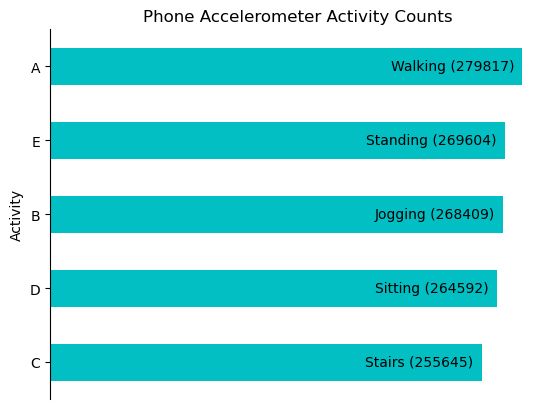

In [8]:
plot_activity_counts(phone_accel_df, 'Phone Accelerometer Activity Counts')

> The leading activity count in the phone accelerometer is **walking**, with a count of **279,817**. The other activities are standing, jogging, sitting, and stairs, with corresponding counts of 279,817, 269,604, 268,409, 264,592, and 255,645.

In [9]:
def plot_activity_distribution(df, x_limit, y_limit, bins):
    columns_to_plot = ['X', 'Y', 'Z']
    activity_colors = {'A': '#FA6E64', 'B': '#02BFC4', 'C': '#7F89FA', 'D': '#404040', 'E': '#BFBFBF'}
    
    for col in columns_to_plot:
        g = sns.FacetGrid(df, col='ACTIVITY', hue='ACTIVITY', height=6, palette=activity_colors)
        g.map(sns.histplot, col, kde=False, bins=bins, label=f'{col}-axis')

        g.add_legend()
        g.set(ylim=x_limit)
        g.set(xlim=y_limit)

        g.fig.suptitle(f'Activity-Wise distribution of {col}', size=40)

        plt.tight_layout()
        plt.subplots_adjust(hspace=0.4)
        plt.show()

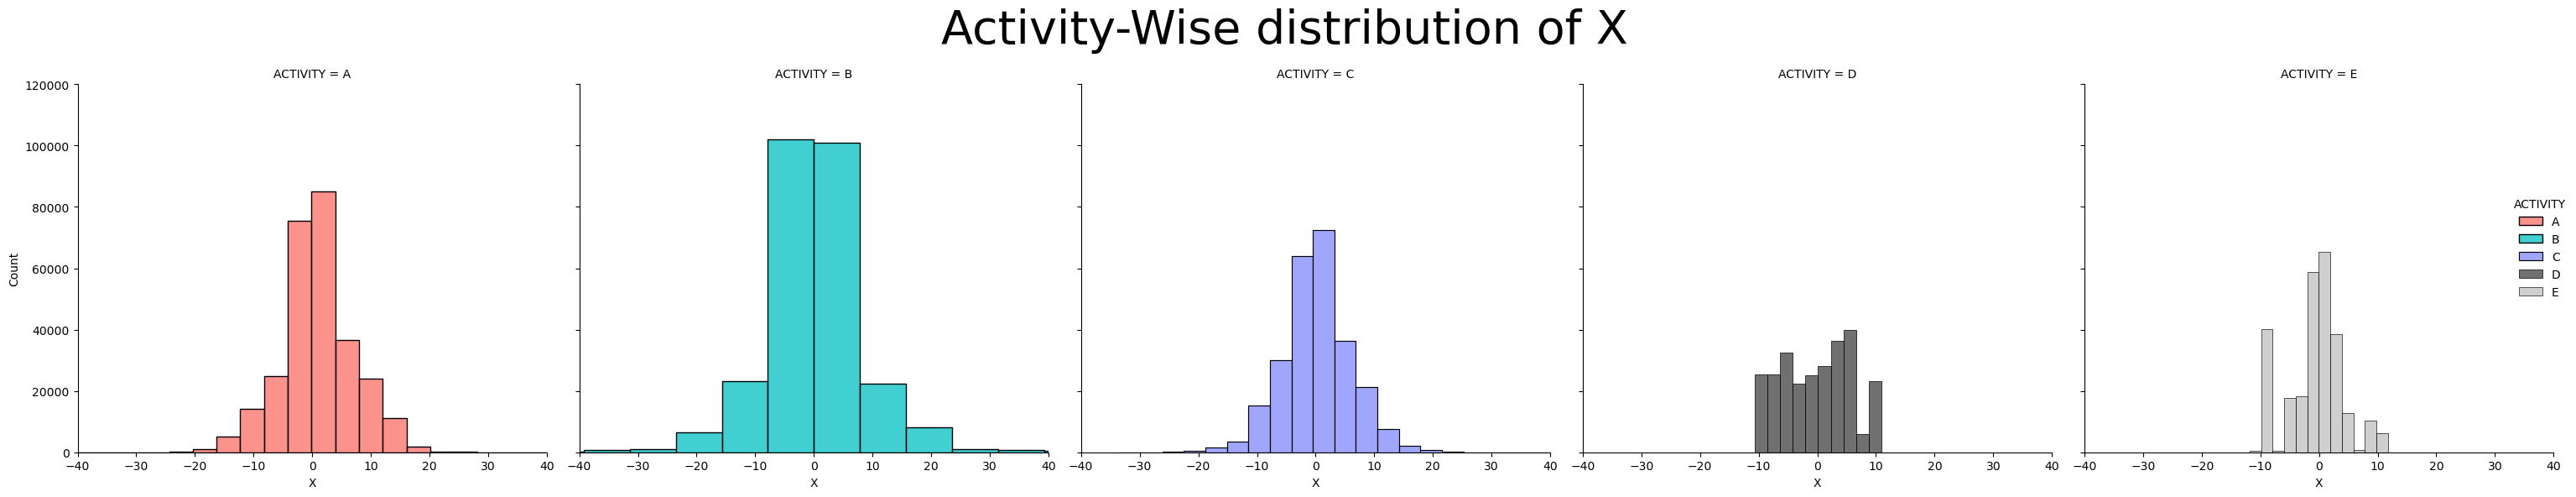

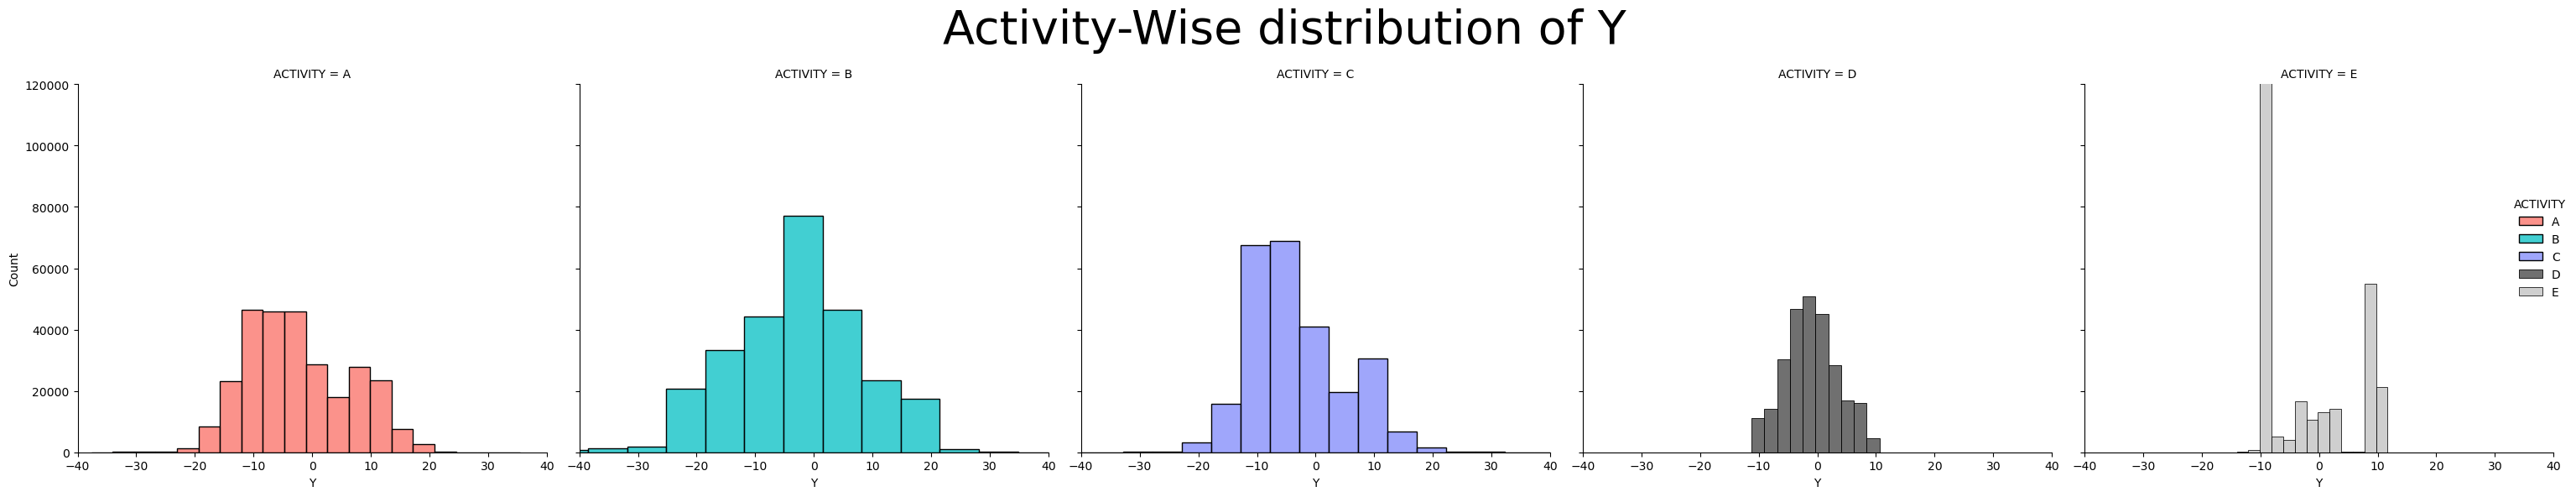

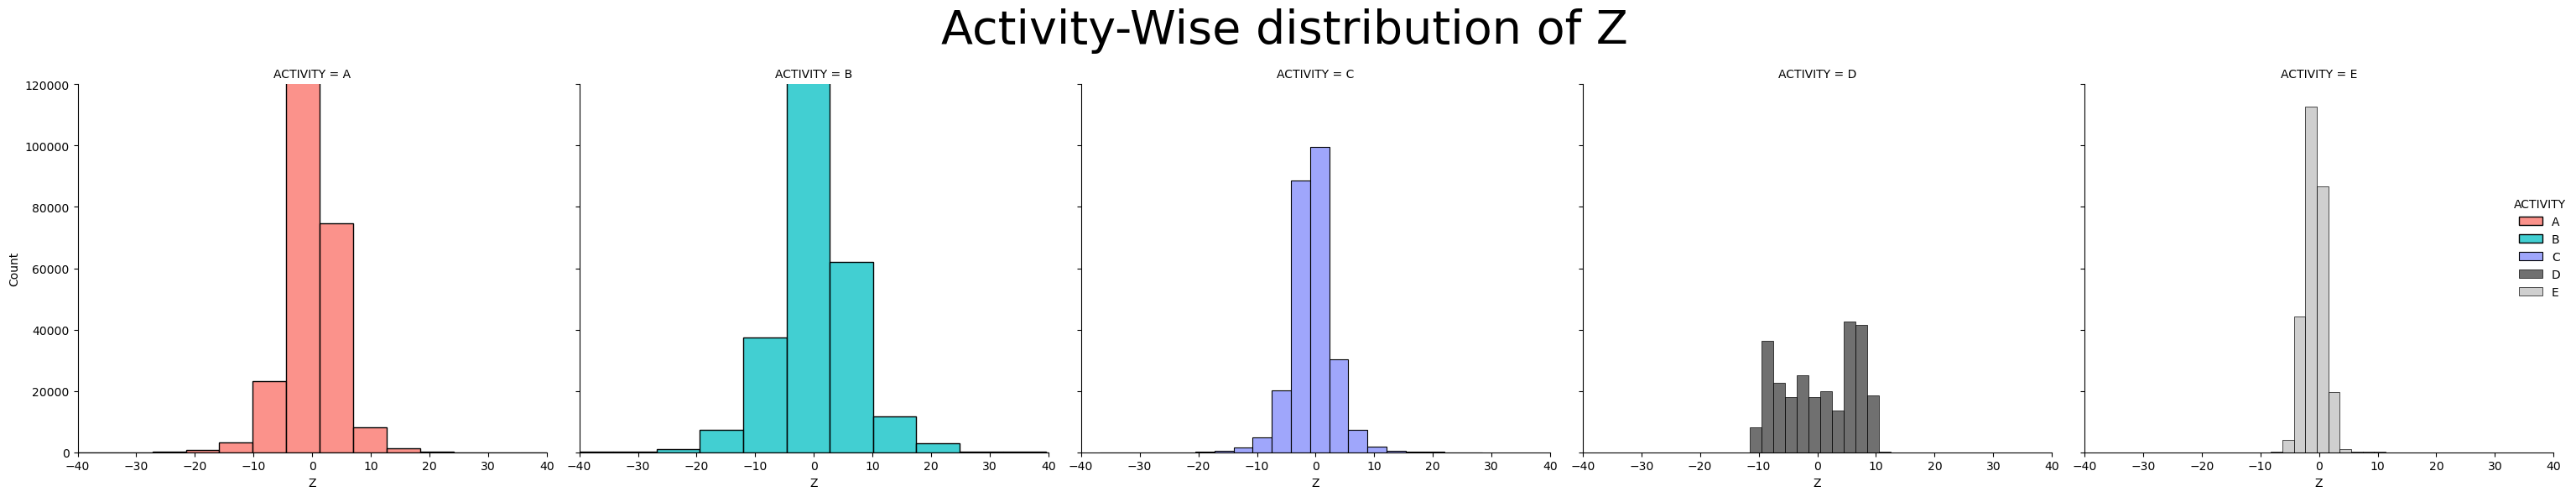

In [10]:
plot_activity_distribution(phone_accel_df, (0, 120000), (-40, 40), 20)

> **Walking A:** The X values are skewed to the right with most values around 0 to 5. For Y values, a similar pattern to the X values can be found but with a slightly wider spread. The Z values are more spread out indicating variations in vertical movements while walking.
>
> **Jogging B:** The X values are concentrated around 0 with a sharp peak indicating consistent forward motion. A broader distribution can be observed for Y values showing more variability in lateral movements during jogging. For the Z values, a sharp peak around 0 indicates consistent vertical motion.
>
> **Stairs C:** The X values are mostly normally distributed. Y values are concentrated at the negative values. Z values values are concentrated but not as peaked as in jogging, showing elevation changes.
>
> **Sitting D:** Y shows a normal distribution but it is slightly centered to the left, while X and Z does not show normal distribution and having no significant peaks. The minimal variations are also as expected due to the stationary nature of sitting.
>
> **Standing E:** Minimal movement can be observed across all three axes. X values showing some even distribution concentrated around 0 but has an outlier peaking at -10; the Y distribution is scattered and has a peak at -10; Z values on the other hand somehow shows an even distribution having its peak at around -5.

In [11]:
import matplotlib.pyplot as plt

def plot_activity_xyz(df, subject_id, title, ytext):
    activities = ['A', 'B', 'C', 'D', 'E']
    subject_df = df[df['SUBJECT-ID'] == subject_id].copy()  
    subject_df.loc[:, 'TIMESTAMP'] = pd.to_datetime(subject_df['TIMESTAMP'].astype(int), unit='us')

    activity_labels = {'A': 'Walking', 'B': 'Jogging', 'C': 'Stairs', 'D': 'Sitting', 'E': 'Standing'}
    fig, axes = plt.subplots(nrows=len(activities), ncols=1, figsize=(15, 6 * len(activities)), edgecolor='gray')  # Set edgecolor

    for i, activity in enumerate(activities):
        activity_df = subject_df[subject_df['ACTIVITY'] == activity].head(400)
        axes[i].plot(activity_df['TIMESTAMP'], activity_df['X'], label=f'X-axis', color='#FA6E64')
        axes[i].plot(activity_df['TIMESTAMP'], activity_df['Y'], label=f'Y-axis', color='#02BFC4')
        axes[i].plot(activity_df['TIMESTAMP'], activity_df['Z'], label=f'Z-axis', color='#7F89FA')

        axes[i].set_title(f'{activity_labels[activity]} ({title})', size=15)
        axes[i].set_xlabel('Timestamp')
        axes[i].set_ylabel(f'{ytext}')
        axes[i].legend()
        axes[i].grid(True)
        
    plt.subplots_adjust(hspace=0.4)
    plt.show()

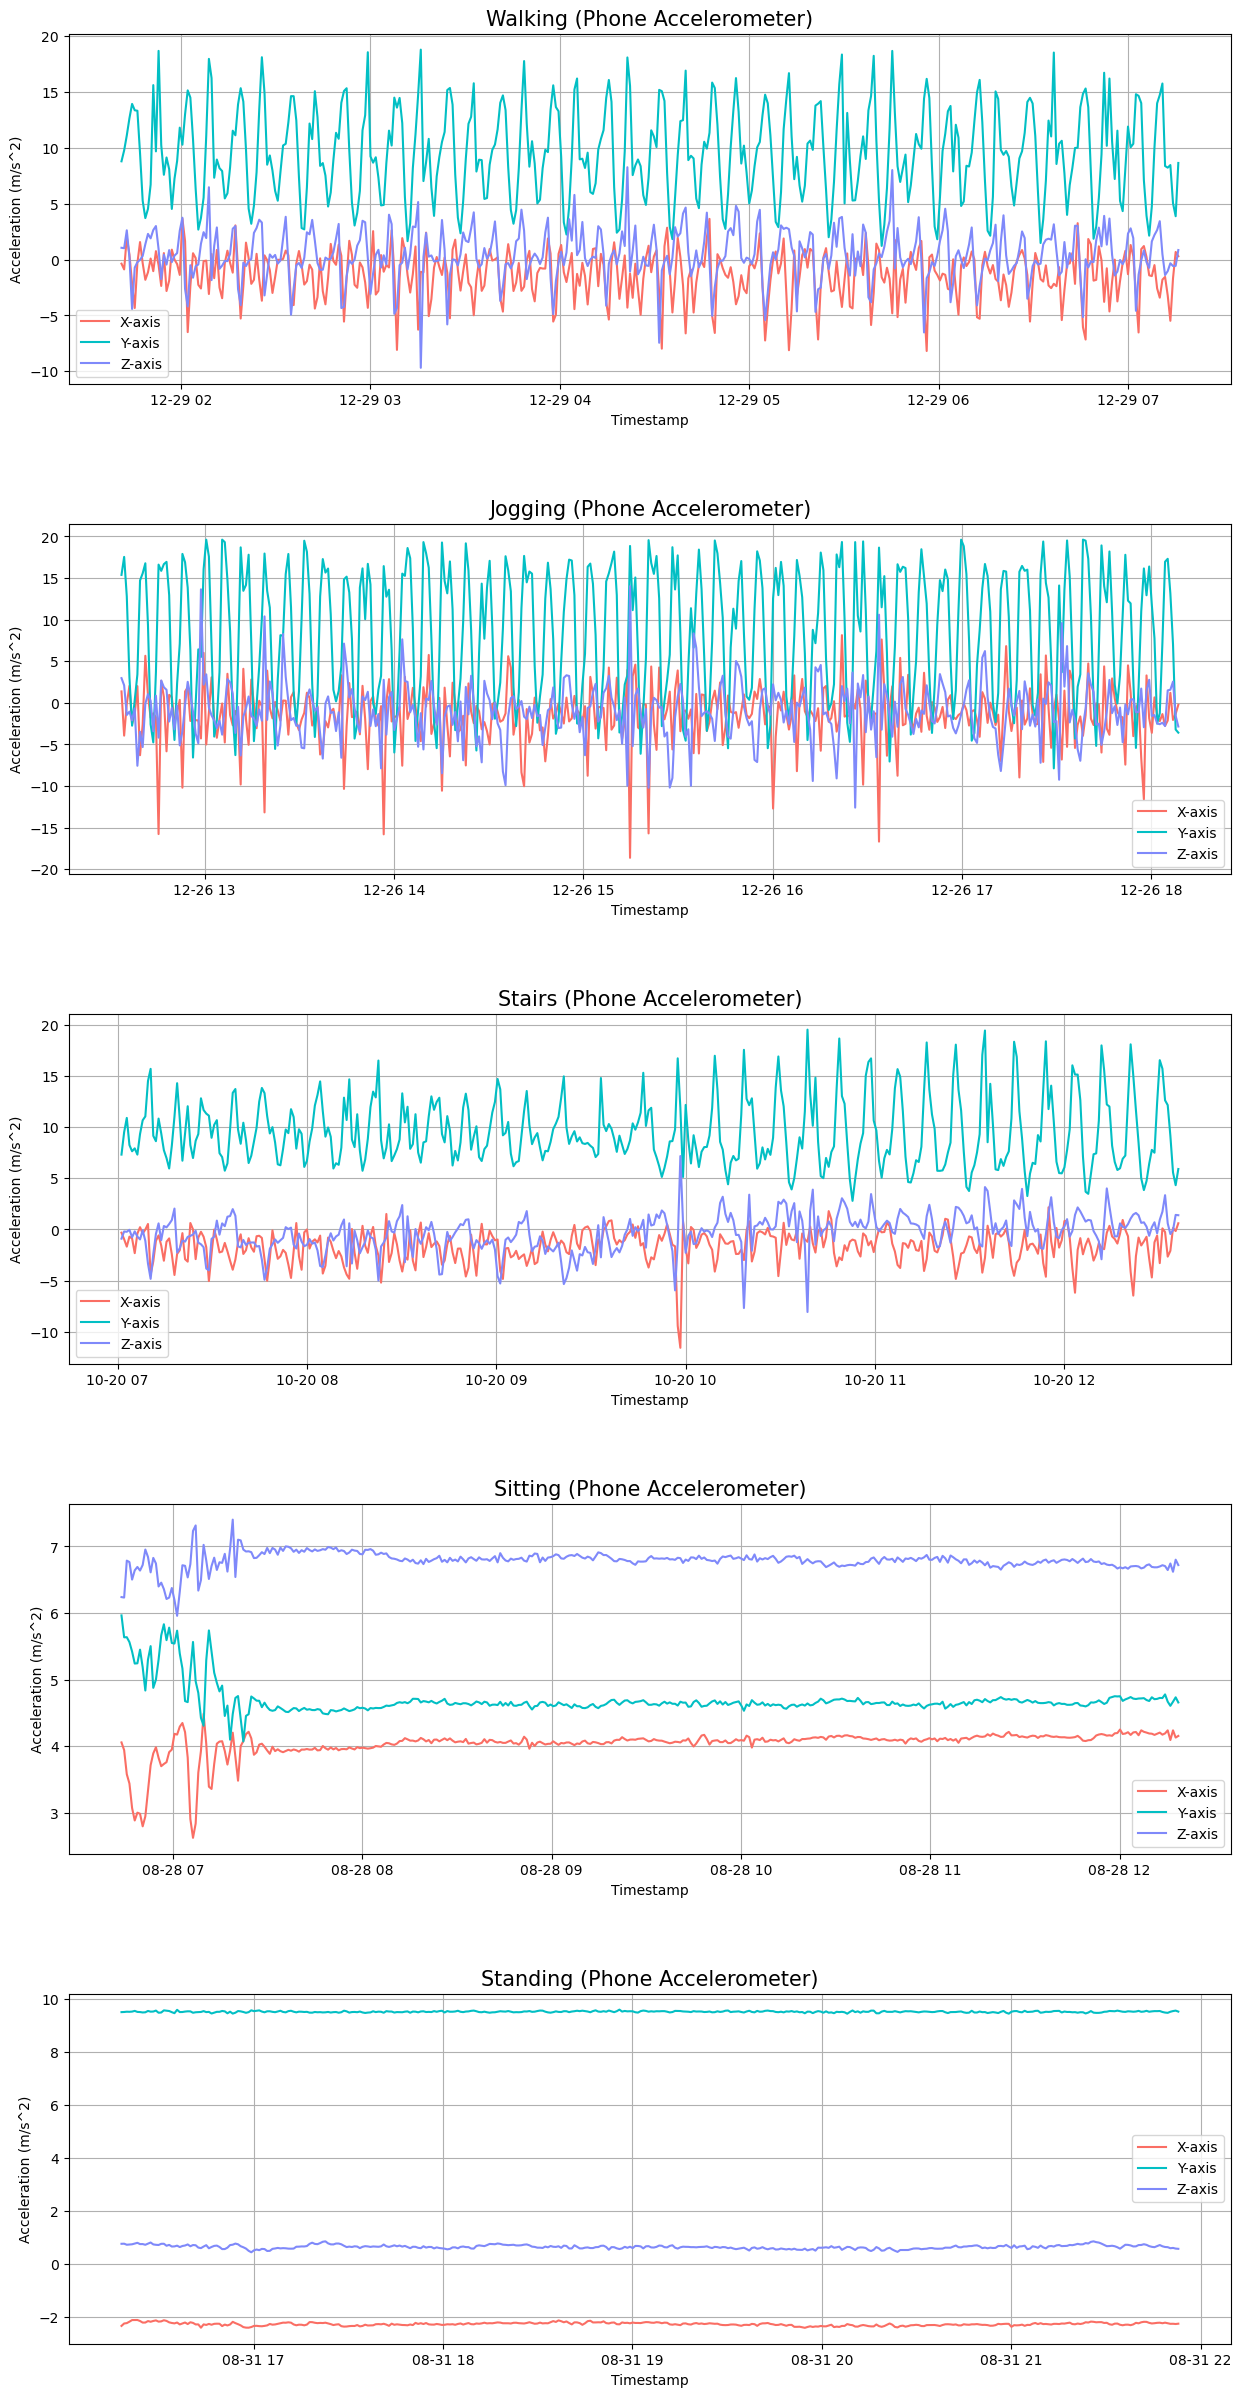

In [12]:
plot_activity_xyz(phone_accel_df, '1600', 'Phone Accelerometer', 'Acceleration (m/s^2)')

The graphs below displays how the signal values in each of the x, y and z dimension varies with time for a subject using a **phone** with **accelerometer**.

> **Walking A:** The metric values for walking are fluctuating for all three axes (X, Y, Z). There is a consistent oscillation indicating the rhythmic nature of walking with X  and Z range from 15 to -15 and Y range from 20 to -5. Altough the wavelength is a bit wider, while the amplitude is not that big.
>
> **Jogging B:** The values are more intense, showing higher intensity and speed compared to walking movements with X range from 10 to -15, Z from 15 to -10, and Y from 20 to -5. The amplitude is maximal, while the wave length is too small for jogging.
>
> **Stairs C:** The metrics show significant fluctuations but less intense than jogging, with values, with X and Z with a range from 0 to -5, and Y from 15 to 5.
>
> **Sitting D:** The X , Y, and Z axis has a slight variation, indicating little movement while sitting. There is also no intersection between the axies, due the less frequency of the the signals. Moreover, the sensors tend to be more stable than other activities. The flunctuations in the beginning can be attributed to transitions in positions like from standing still to sitting.
>
> **Standing E:** For standing, X and Z axis are intersects. Although values tend to be stable for like sitting,  the X and Z axis are more sensitive.


### Phone Gyrocope

In [13]:
phone_gyro_path = "/Users/christineloveladringan/Documents/College/2Q2324/DS169/widsm/wisdm-dataset/raw/phone/gyro"

phone_gyro_df = raw_dataframe(phone_gyro_path)
phone_gyro_df.head()

SUBJECT-ID ACTIVITY        TIMESTAMP         X         Y         Z
0       1600        A  252207918580802 -0.853210  0.297226  0.890182
1       1600        A  252207968934806 -0.875137  0.015472  0.162231
2       1600        A  252208019288809 -0.720169  0.388489 -0.284012
3       1600        A  252208069642813 -0.571640  1.227402 -0.241669
4       1600        A  252208119996817 -0.380493  1.202835 -0.213135

In [14]:
print("Number of raw data for phone gyrocope:", phone_gyro_df.shape[0])

Number of raw data for phone gyrocope: 1006749


In [15]:
phone_gyro_df['ACTIVITY'].value_counts().sort_index()

A    203919
B    200252
C    197857
D    202370
E    202351
Name: ACTIVITY, dtype: int64

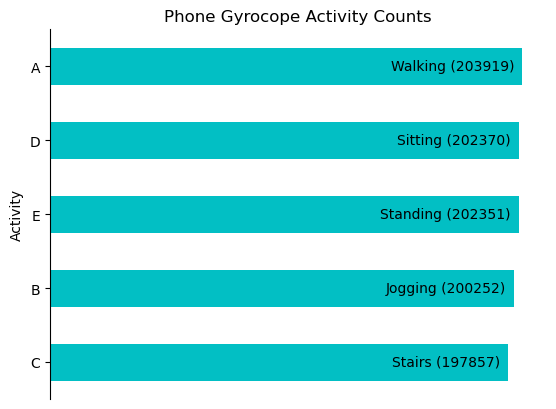

In [16]:
plot_activity_counts(phone_gyro_df, 'Phone Gyrocope Activity Counts')

>  Walking has the highest count for **phone gyroscope** with a value of **203,919**. Sitting, standing, jogging, and stairs with corresponding counts of 202,370, 202,351, 200,252, and 197,857, respectively.

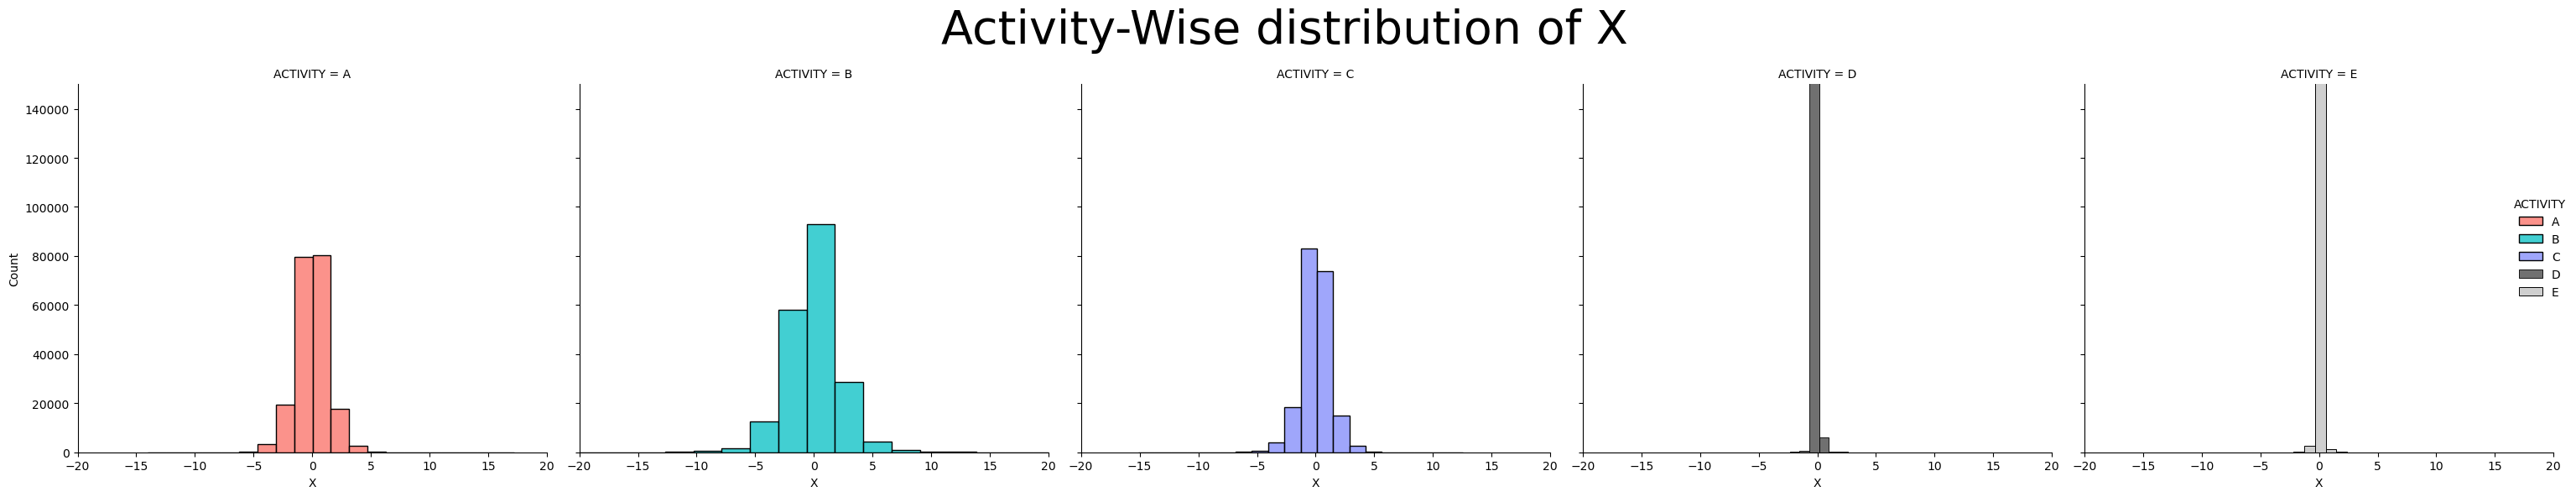

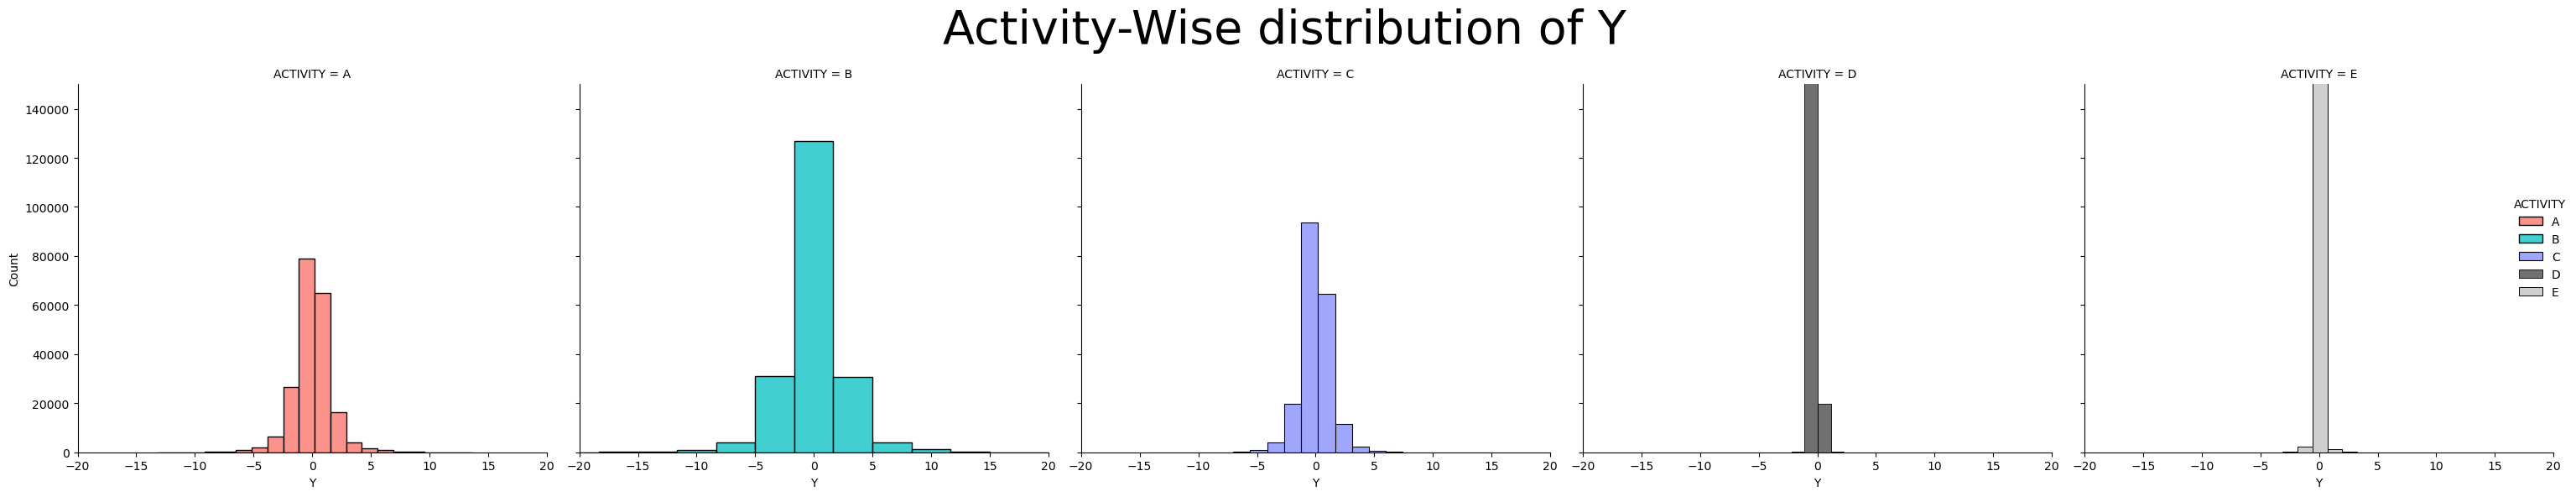

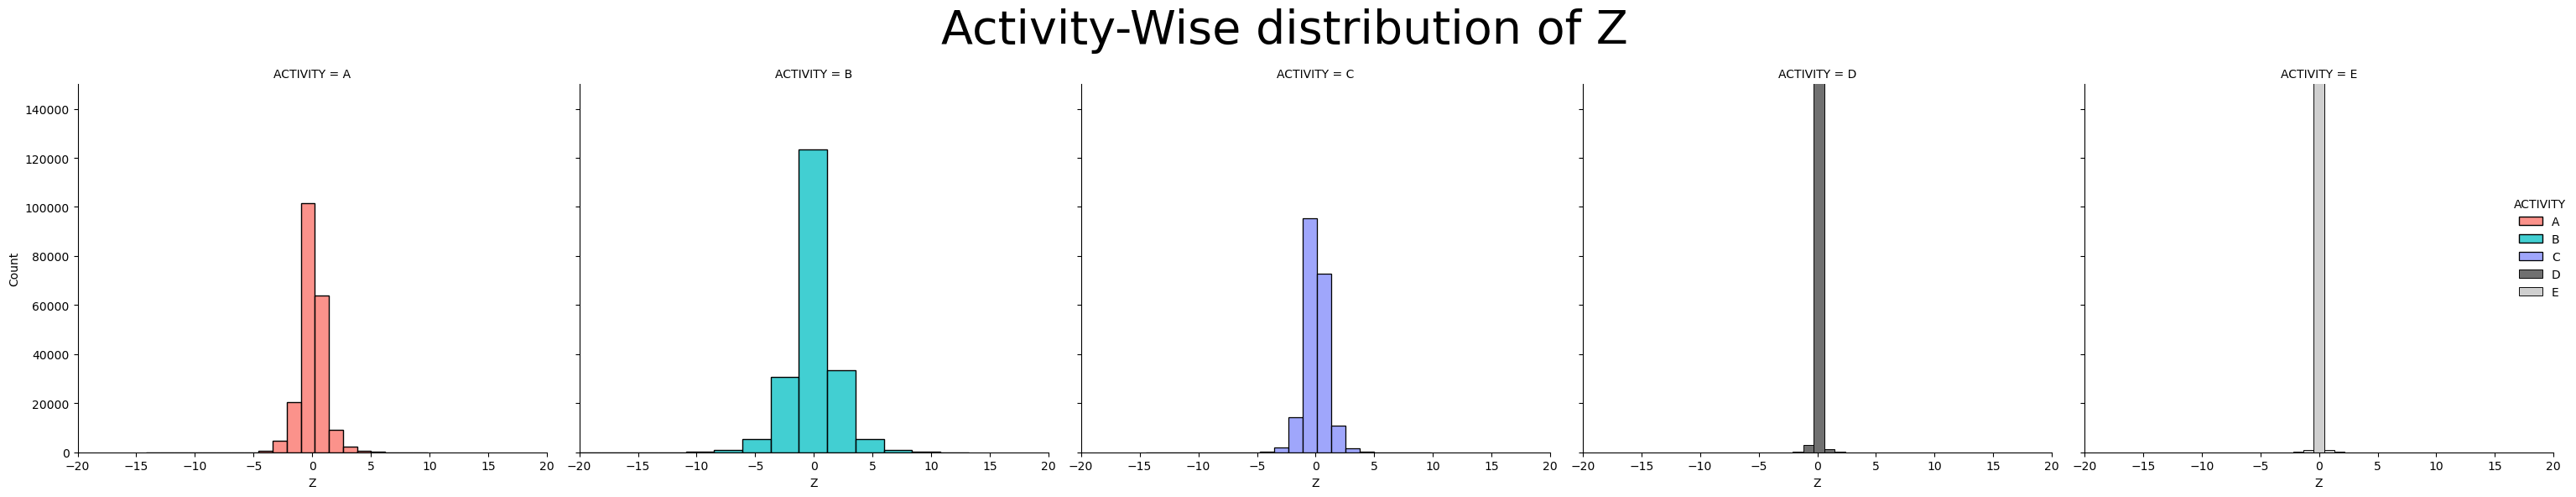

In [17]:
plot_activity_distribution(phone_gyro_df, (0, 150000), (-20, 20), 20)

> **Walking A:** The X values have a prominent peak around 0. Y values show a peak around 0. The Z values show a distribution peaking near 0.
>
> **Jogging B:** The X values show a distribution with peaks around 0. Y  and Z values show a more spread out distribution with the highest frequency occurring.
>
> **Stairs C:** The X, Y, and Z values shows a distribution with its peak around  0 
>
> **Sitting D:** The X values show some activity but not as pronounced as walking or jogging. For the Y, similar to the X-axis with moderate activity. There is also minimal activity for Z-values indicating that there is not much movement along this axis during stair climbing.
>
> **Standing E:** Similar to sitting, all three axes have minimal variations showing little to no movement when standing.

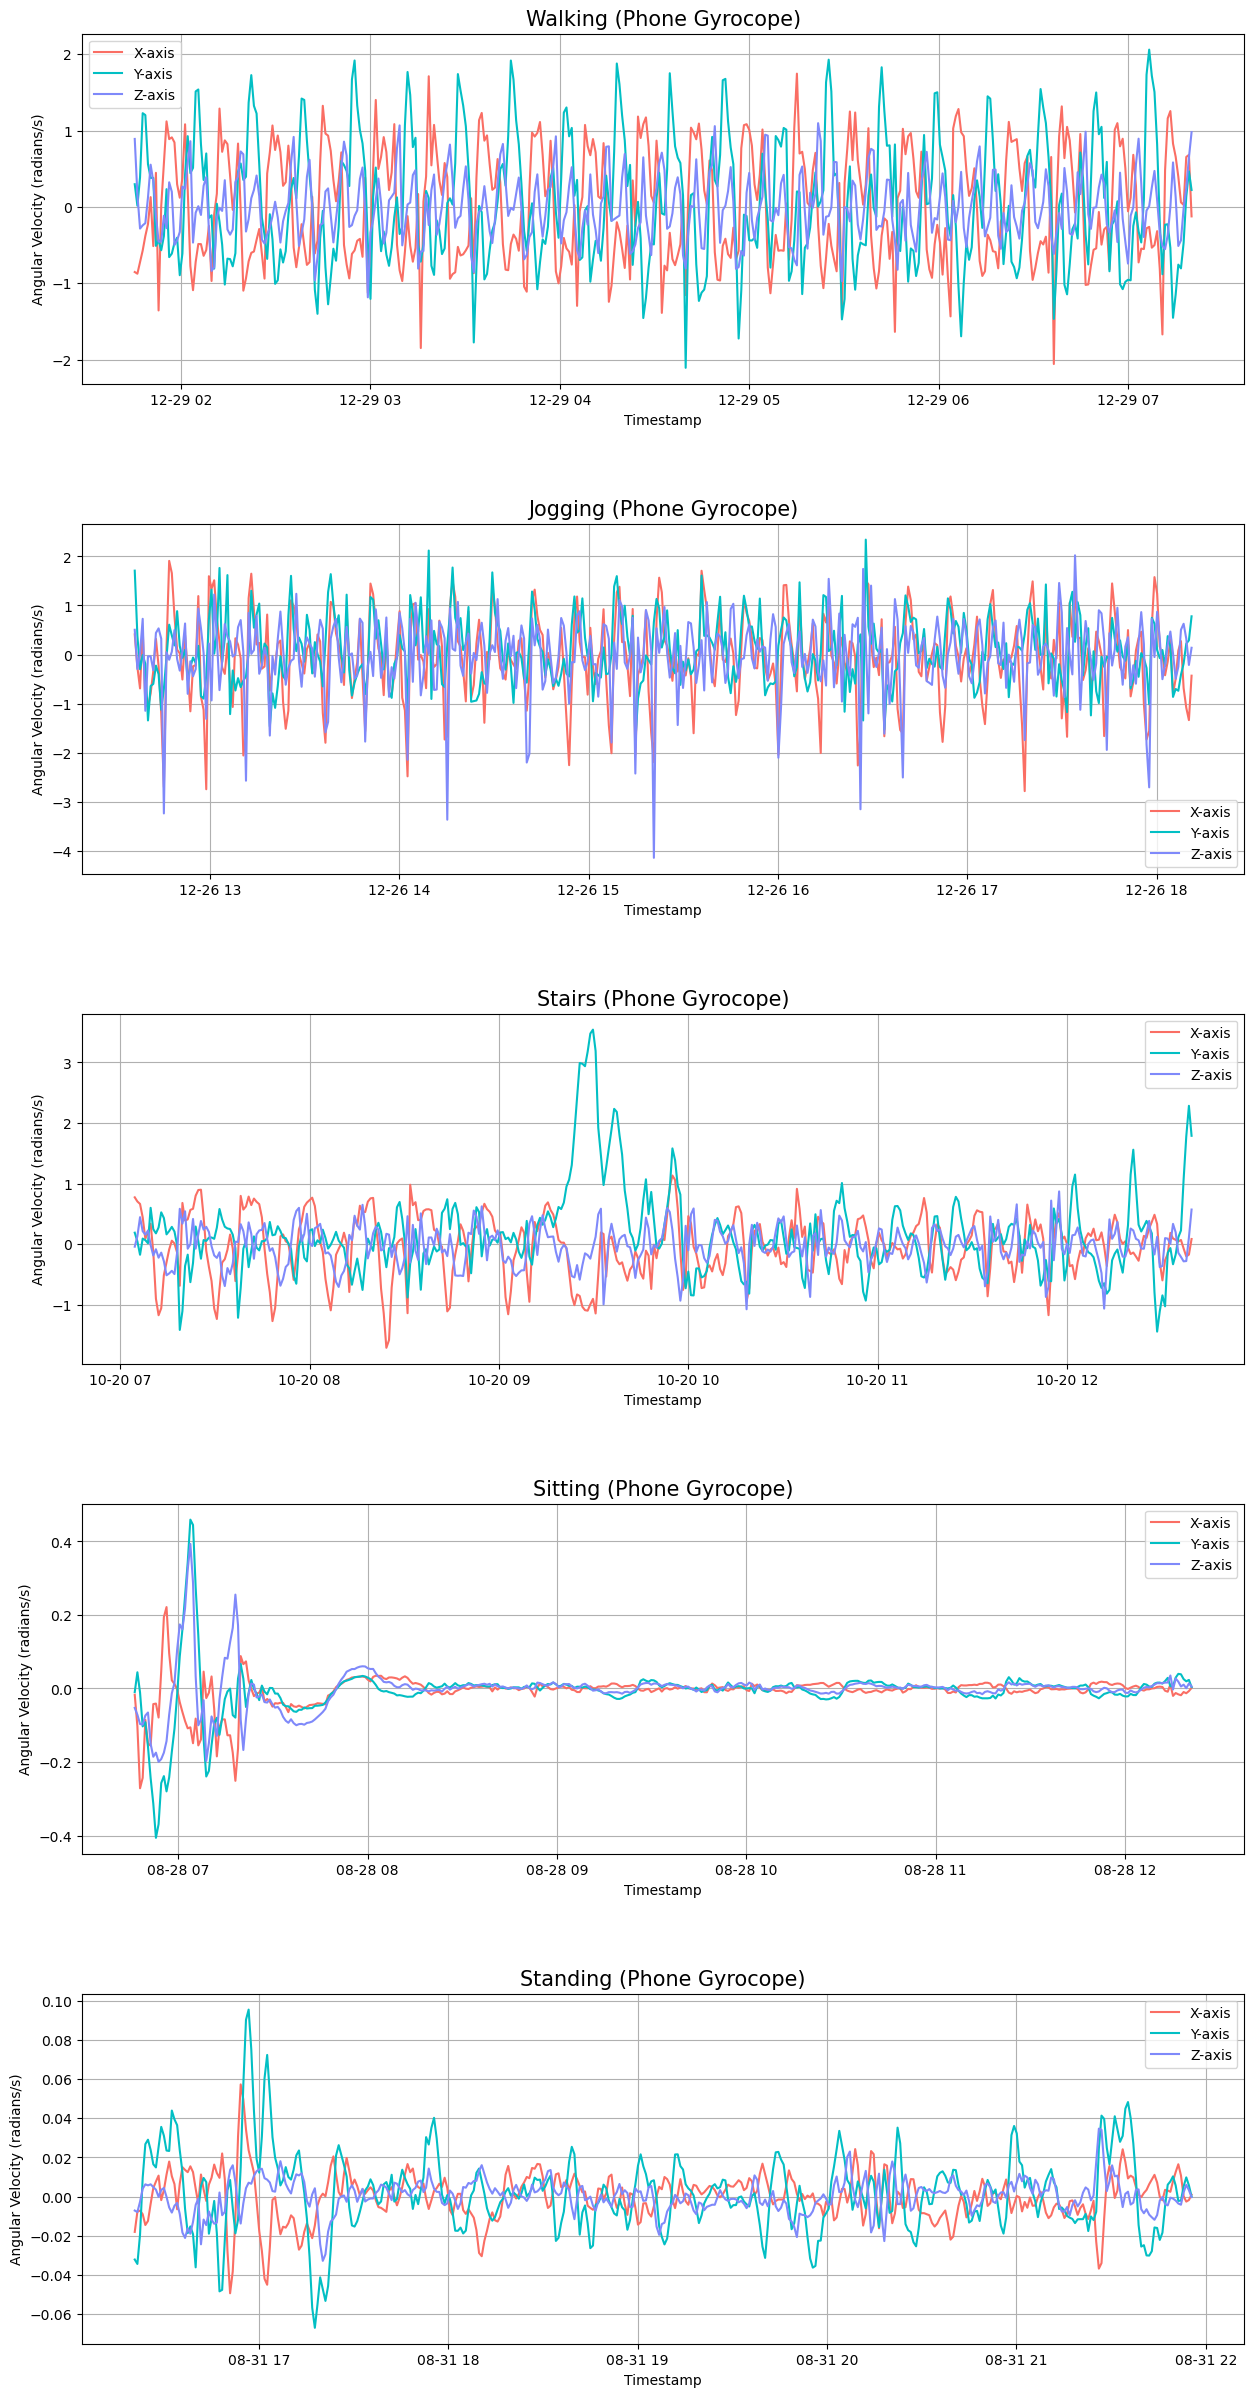

In [18]:
plot_activity_xyz(phone_gyro_df, '1600', 'Phone Gyrocope', 'Angular Velocity (radians/s)')

The graphs below displays how the signal values in each of the x, y and z dimension varies with time for a subject using a **phone** with **gyrocope**.

> **Walking A:** The gyroscope data for walking shows frequent and consistent fluctuations in all three axes (X, Y, Z) with X and Y ranges from 1.5 to -1.5 and Z with 1 to -1. This pattern is consistent with the varied and rhythmic movements associated with walking.
>
> **Jogging B:** Similar to walking, jogging also exhibits consistent fluctuations but with higher intensity, indicating more forceful movements with X range from 2 to -3 Y from 2 to-1 and Z from 2 to -4. These pronounced variations can be attributed to the faster and more forceful movements during jogging.
>
> **Stairs C:** Climbing stairs shows a distinct pattern with sharp peaks and troughs, especially noticeable in the Z-axis. The value ranges are broader compared to walking and jogging. With X and Z range from 1 to -1 and Y with 3 to -1.  
>
> **Sitting D:** While sitting, the gyroscope data is relatively stable with minor fluctuations indicating slight movements. The stability of the signals is indicative of a stationary activity like sitting.
>
> **Standing E:** Standing shows moderate fluctuations compared to sitting but less than walking or jogging with X range from 0.06 to -0.04, Y with 0.10 to -0.06, and Z with 0.4 to -0.02. Even while standing still, there’s always some amount of body sway or adjustment needed for maintaining balance which is captured by these moderate fluctuations.

### Watch Accelerometer

In [19]:
watch_accel_path = "/Users/christineloveladringan/Documents/College/2Q2324/DS169/widsm/wisdm-dataset/raw/watch/accel"

watch_accel_df = raw_dataframe(watch_accel_path)
watch_accel_df.head()

SUBJECT-ID ACTIVITY       TIMESTAMP         X         Y         Z
0       1600        A  90426708196641  7.091625 -0.591667  8.195502
1       1600        A  90426757696641  4.972757 -0.158317  6.696732
2       1600        A  90426807196641  3.253720 -0.191835  6.107758
3       1600        A  90426856696641  2.801216 -0.155922  5.997625
4       1600        A  90426906196641  3.770868 -1.051354  7.731027

In [20]:
print("Number of raw data for watch accelerometer:", watch_accel_df.shape[0])

Number of raw data for watch accelerometer: 1053141


In [21]:
watch_accel_df['ACTIVITY'].value_counts().sort_index()

A    210495
B    205787
C    207312
D    213018
E    216529
Name: ACTIVITY, dtype: int64

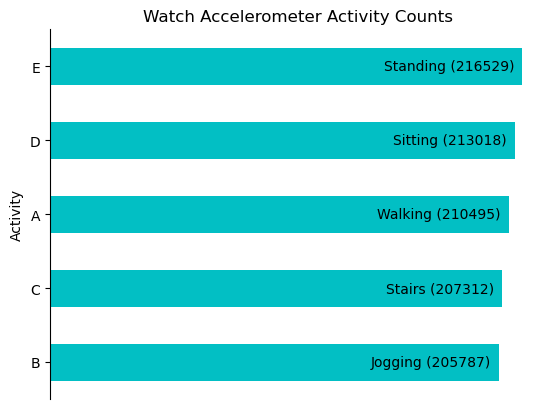

In [22]:
plot_activity_counts(watch_accel_df, 'Watch Accelerometer Activity Counts')

> For watch accelerometer, the activity with the highest count is standing, with a value of **216,529**. The other activities are sitting, walking, stairs, and jogging have counts of 213,018, 210,495, 207,312, and 205,787, respectively.

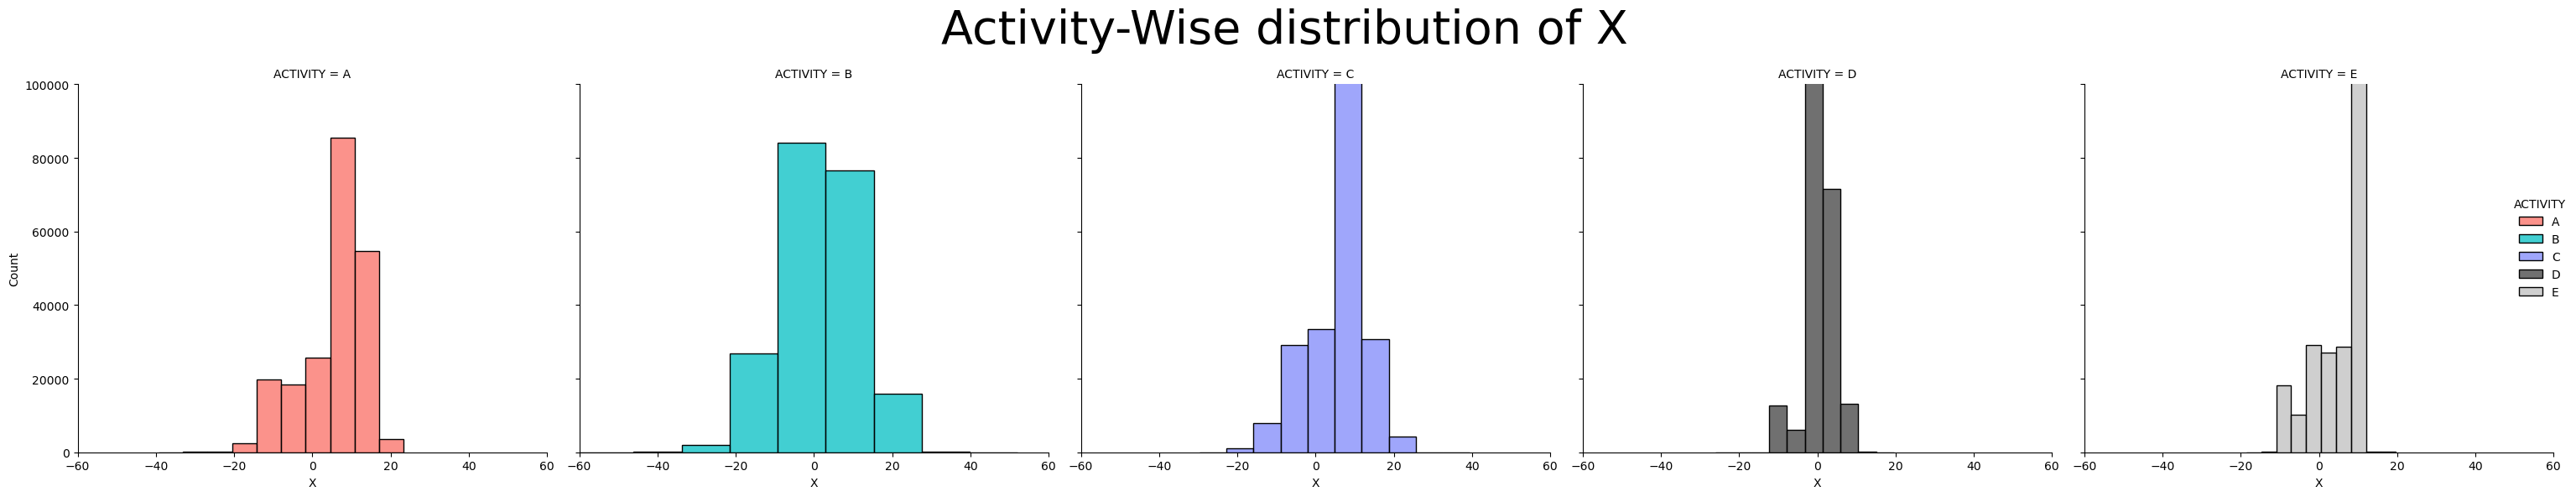

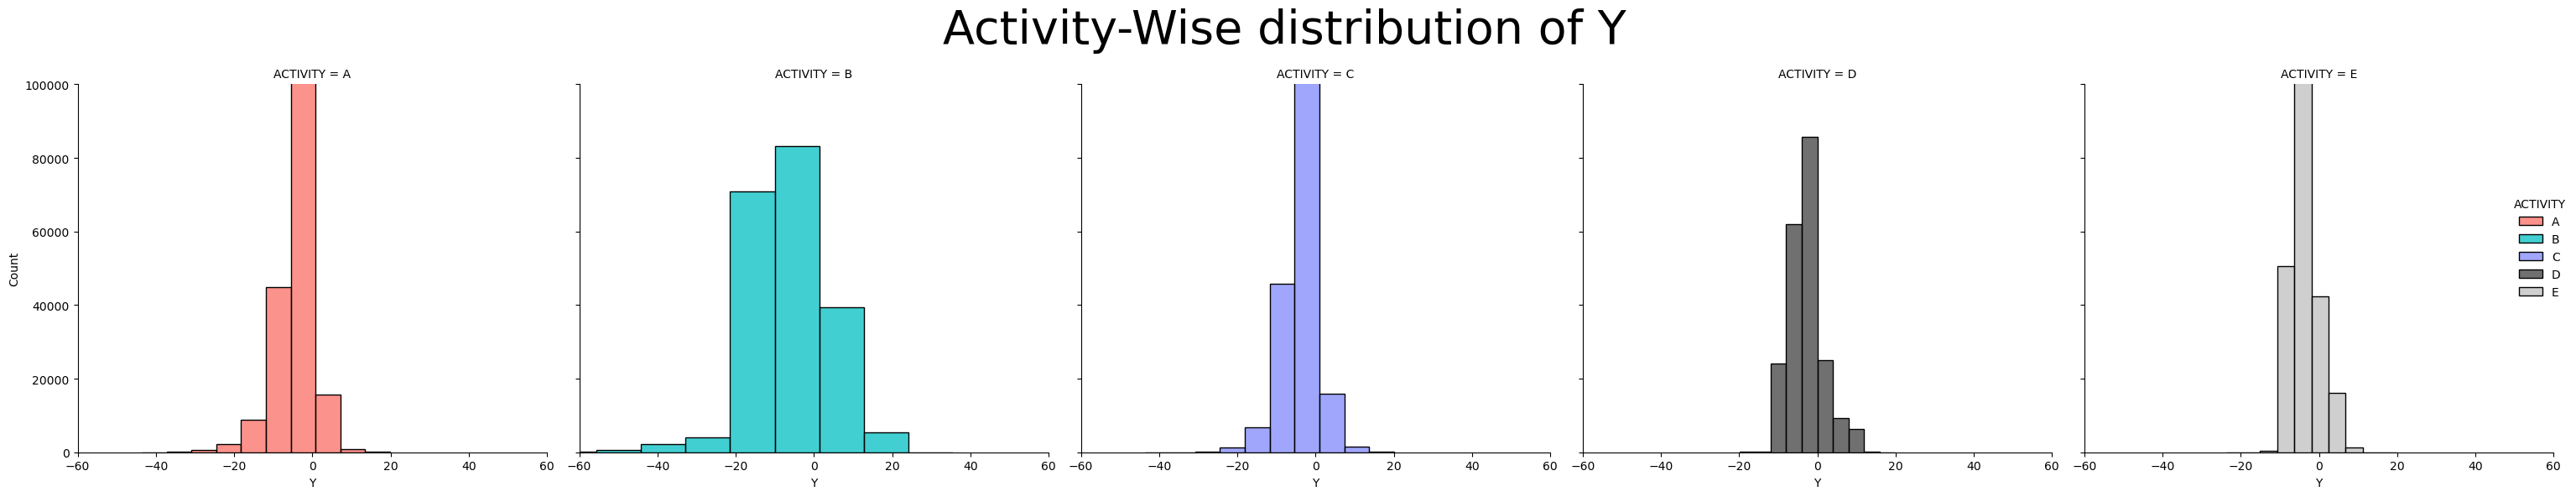

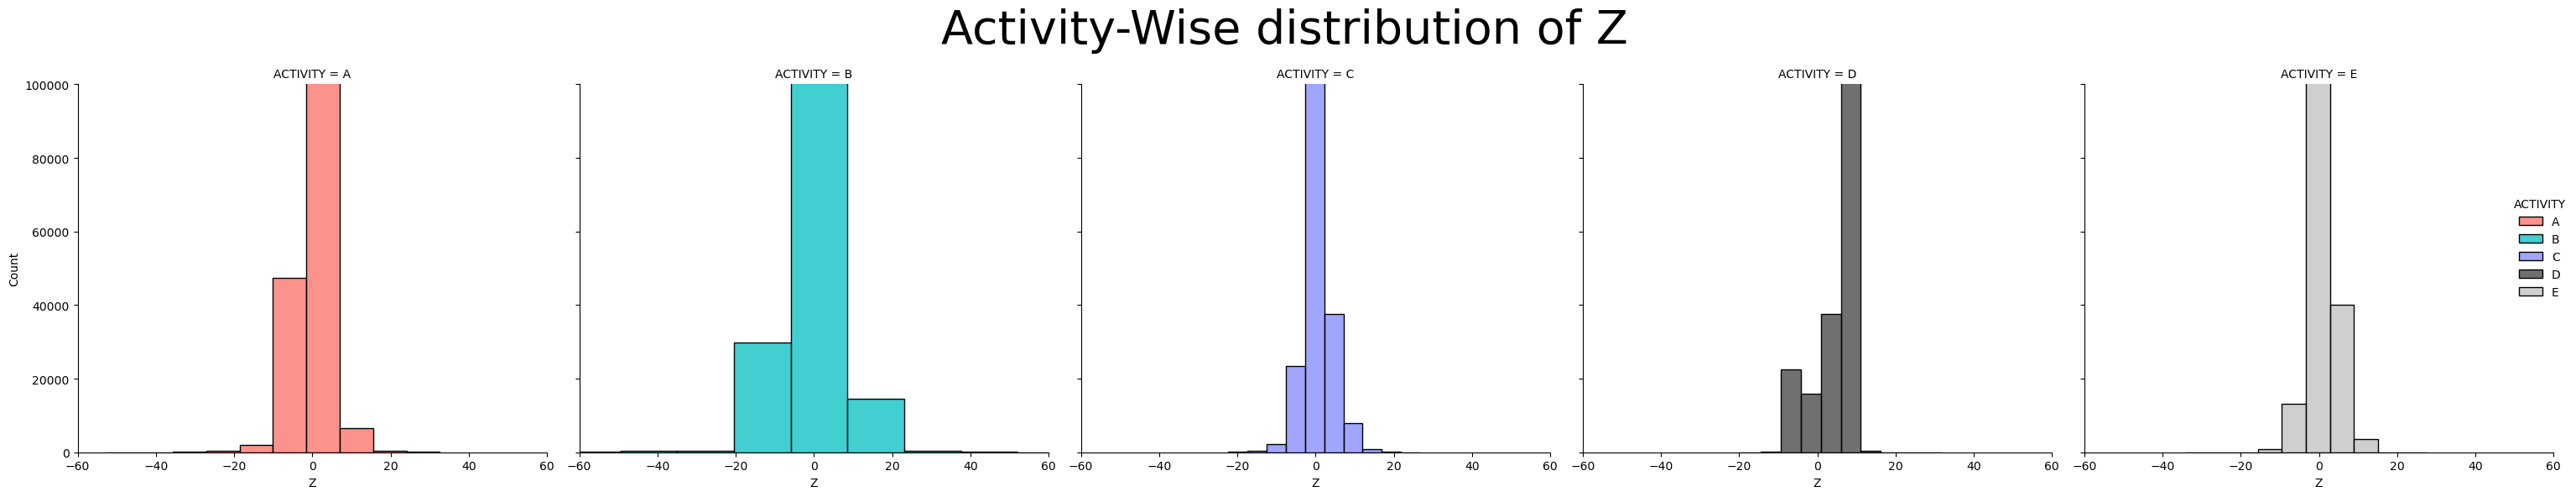

In [23]:
plot_activity_distribution(watch_accel_df, (0, 100000), (-60, 60), 10)

> **Walking A:** The X values are mostly positive with a peak around 10 and Y values are mostly negative, with peaks around -10. The Z-axis shows more spread out values, indicating variations in vertical movements while walking.
>
> **Jogging B:** The X-axis shows a sharp peak at 0, indicating consistent forward motion. The Y-axis shows a broader distribution, indicating more variability in lateral movements during jogging. The Z-axis shows a sharp peak around 0, indicating consistent vertical motion.
>
> **Stairs C:** The X values are mostly skewed to the positive side having a peak at 10 and Y values are skewed to the negative values, with peaks at around -10; the Z distribution is slightly skewed towards positive values having a peak at 0.
>
> **Sitting D:** The X and Y values are skewed to the positives values while Z is skewed to the negative values.
>
> **Standing E:** The X distribution mostly skewed to the negative values but having a peak at around 10; Y are skewed to the positive values but having a peak around -10; Z  values has its peak at 0.

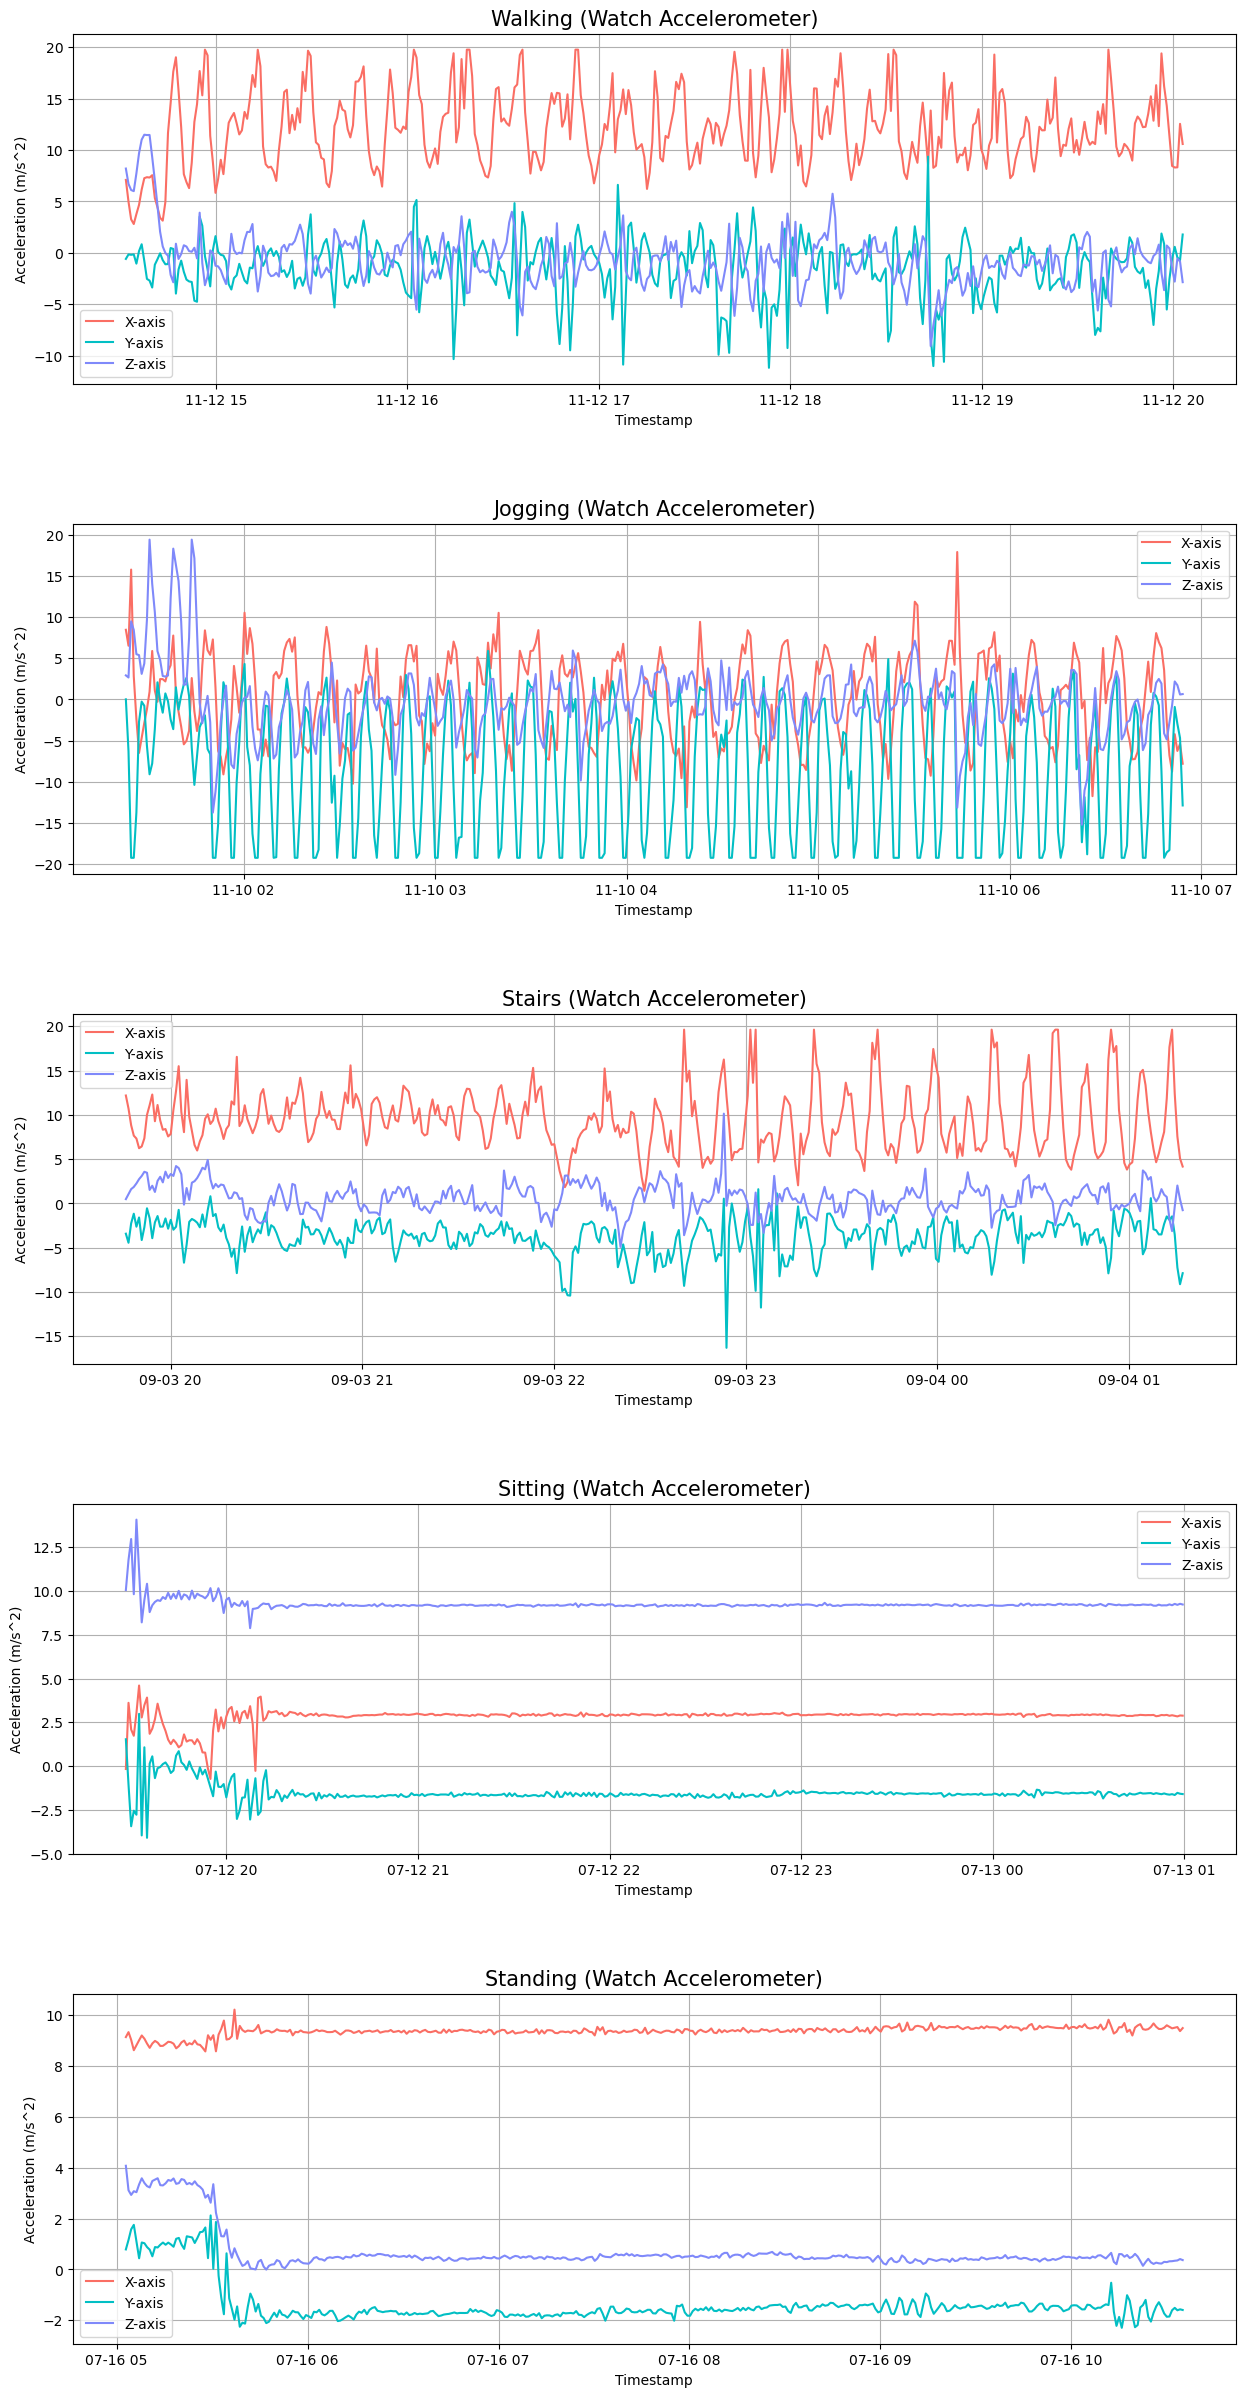

In [24]:
plot_activity_xyz(watch_accel_df, '1600', 'Watch Accelerometer', 'Acceleration (m/s^2)')

The graphs below displays how the signal values in each of the x, y and z dimension varies with time for a subject using a watch with accelerometer.

> **Walking A:** The accelerometer data for walking shows regular fluctuations in all three axes, indicating the rhythmic nature of walking with X range from 5 to 20, Y with -10 to 10, and Z 10 to -10.
>
> **Jogging B:** There are more pronounced and rapid fluctuations in all axes compared to walking, reflecting higher intensity motion. The X ranges from 15 to -10 Y from 0 to -20 and Z from 20 to -15.
>
> **Stairs C:** The data for climbing stairs shows significant fluctuations, but they are less intense than jogging. This suggests varied motion patterns as one climbs or descends stairs with X range from 0 to 10 Y from -5 to -15 and Z from 0 to 10.
>
> **Sitting D:** During the transition from a static position to sitting, there can be subtle movements or adjustments in body position contributing to the initial flunctuation. As it progress, the data for sitting shows minimal fluctuations. Such low variance in sensor data over time can be used as a marker for identifying when the subject is sitting.
>
> **Standing E:** Same with sitting, the initial flunctuations can be attributed to changing possitions. Moreover, unlike sitting, there are slight movements that occur while standing still. The values of the X range from 8 to 10 Y from 2 to -2 and Z with 4 to 0. 

### Watch Gyrocope

In [25]:
watch_gyro_path = "/Users/christineloveladringan/Documents/College/2Q2324/DS169/widsm/wisdm-dataset/raw/watch/gyro"

watch_gyro_df = raw_dataframe(watch_gyro_path)
watch_gyro_df.head()

SUBJECT-ID ACTIVITY       TIMESTAMP         X         Y         Z
0       1600        A  90426757696641  0.314944 -1.022277 -0.309962
1       1600        A  90426807196641  0.387382 -0.618541 -0.048972
2       1600        A  90426856696641  0.070999 -0.209480 -0.195978
3       1600        A  90426906196641  0.037975  0.254976 -0.156563
4       1600        A  90426955696641  0.073129  0.719431 -0.001035

In [26]:
print("Number of raw data for watch gyrocope:", watch_gyro_df.shape[0])

Number of raw data for watch gyrocope: 949933


In [27]:
watch_gyro_df['ACTIVITY'].value_counts().sort_index()

A    192531
B    187833
C    180416
D    195050
E    194103
Name: ACTIVITY, dtype: int64

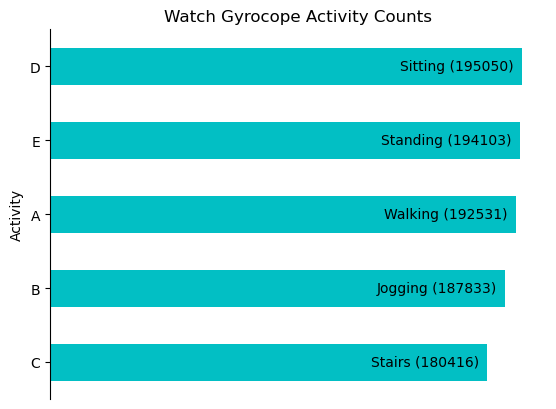

In [28]:
plot_activity_counts(watch_gyro_df, 'Watch Gyrocope Activity Counts')

> Based from the graph, the leading activity count  for phone accelerometer is **sitting**, with a count of **195,050**. The other activities are standing, walking, jogging, and stairs with counts of 279,817, 269,604, 268,409, 264,592, and 255,645.

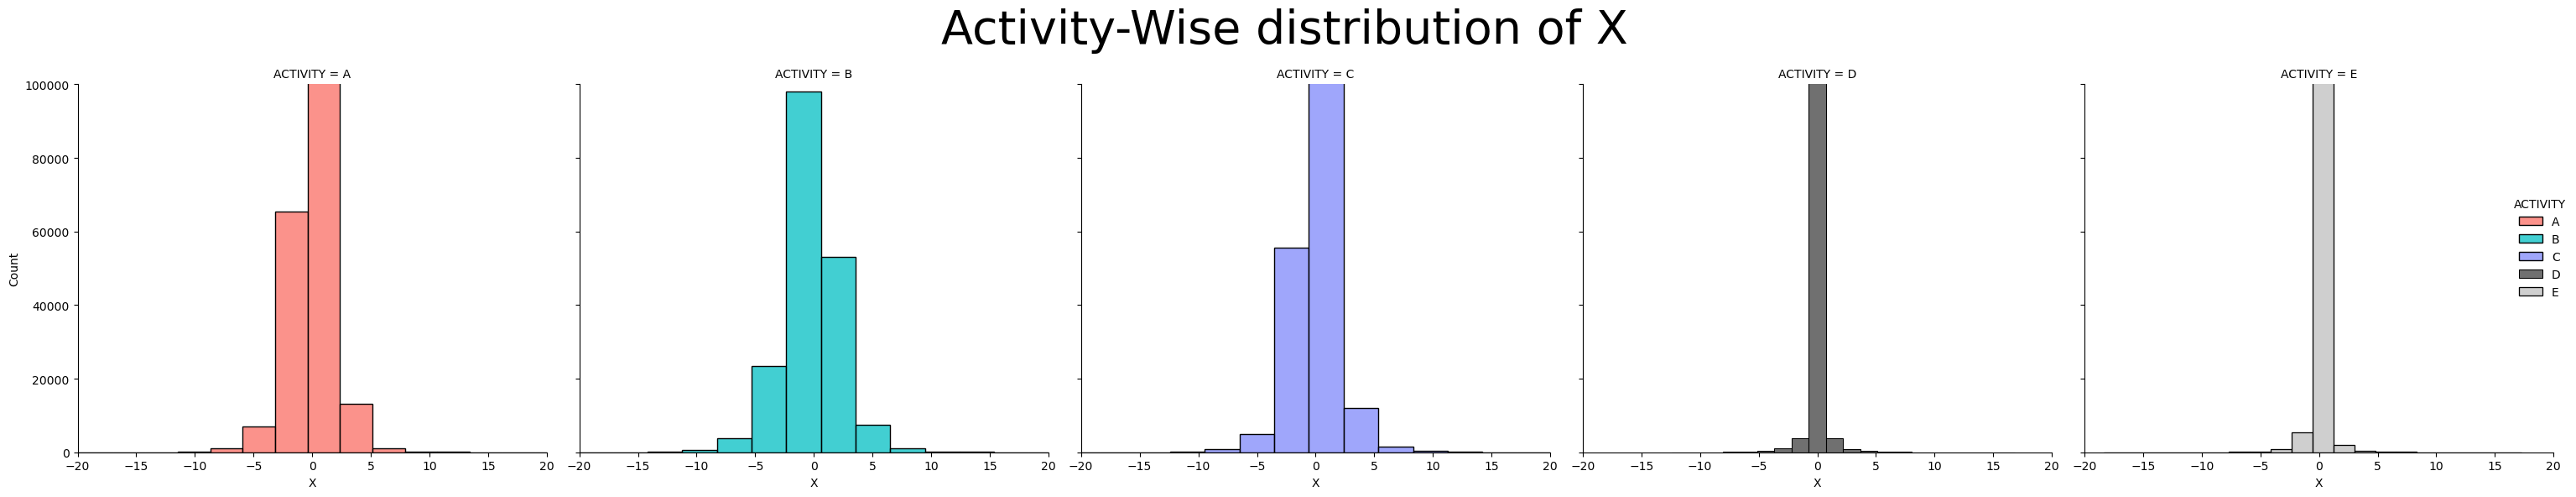

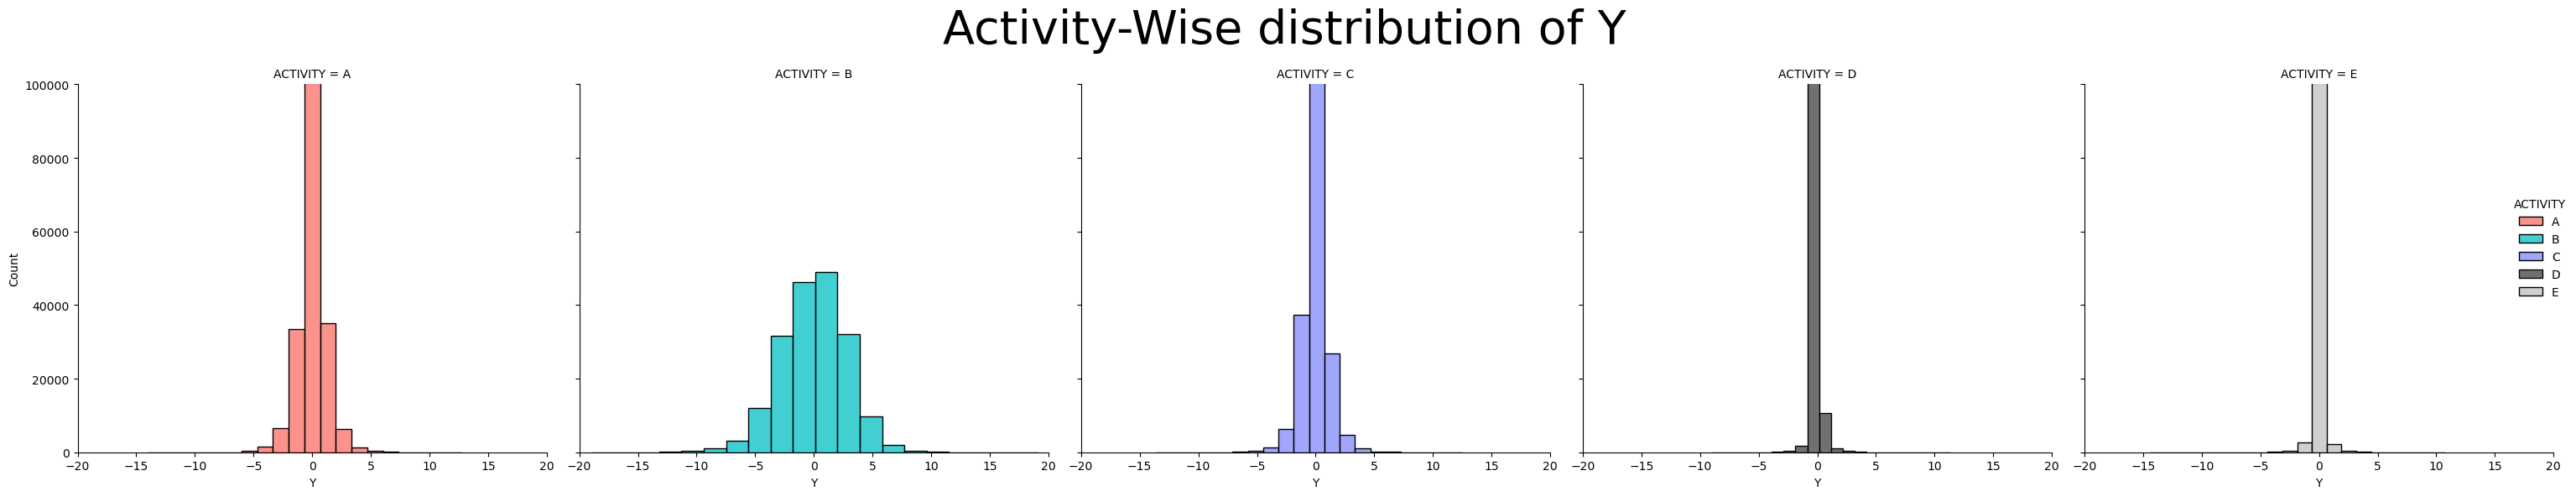

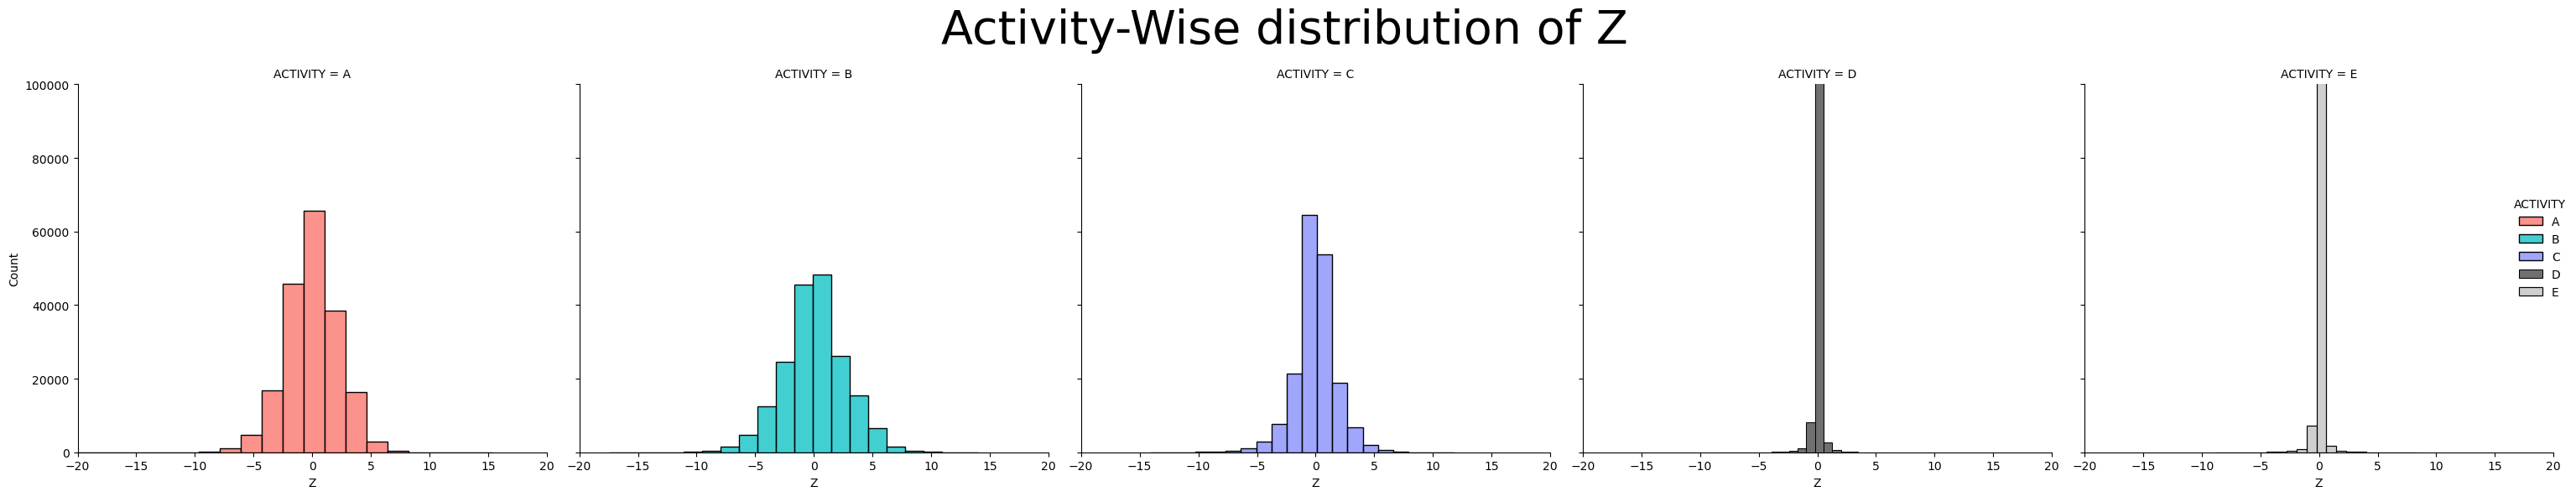

In [29]:
plot_activity_distribution(watch_gyro_df, (0, 100000), (-20, 20), 20)

> **Walking A:** There is a broad distribution indicating varied movements in the X axis while walking.
For the Y, a narrower peak suggests more consistent and repetitive motion. The Z-axis is similar to X-axis,  but less varied. Walking involves consistent yet varied movements detected in all three axes.
>
> **Jogging B:** The X and Y values both have peaks at around -2.5 and are mostly negative, while the Z values are more evenly distributed across the range. There is a prominent peak in the X-axis indicating a strong repetitive motion. The Y axis also displays a peak but less pronounced than X. The Z-axis has broad distribution similar to walking but more intense.
>
> **Stairs C:** The X and Y distributions for Activity C are similar to those of Activity B but in the positive sides, with peaks at around 0 - 2.5 and primarily positive values; and the Z distribution is slightly skewed towards positive  values.
>
> **Sitting D:** All of X, Y, and Z distributions show smaller frequency counts compared to other activities; however, there is a notable peak in the negative range for Y.
>
> **Standing E:** The X distribution is fairly even across the range but has a small peak at around -2.5; Y shows an even distribution without any significant peaks; Z has its highest frequency in the negative range. Standing also involves limited movement like sitting but with slight shifts or sways detectable by the gyroscope.

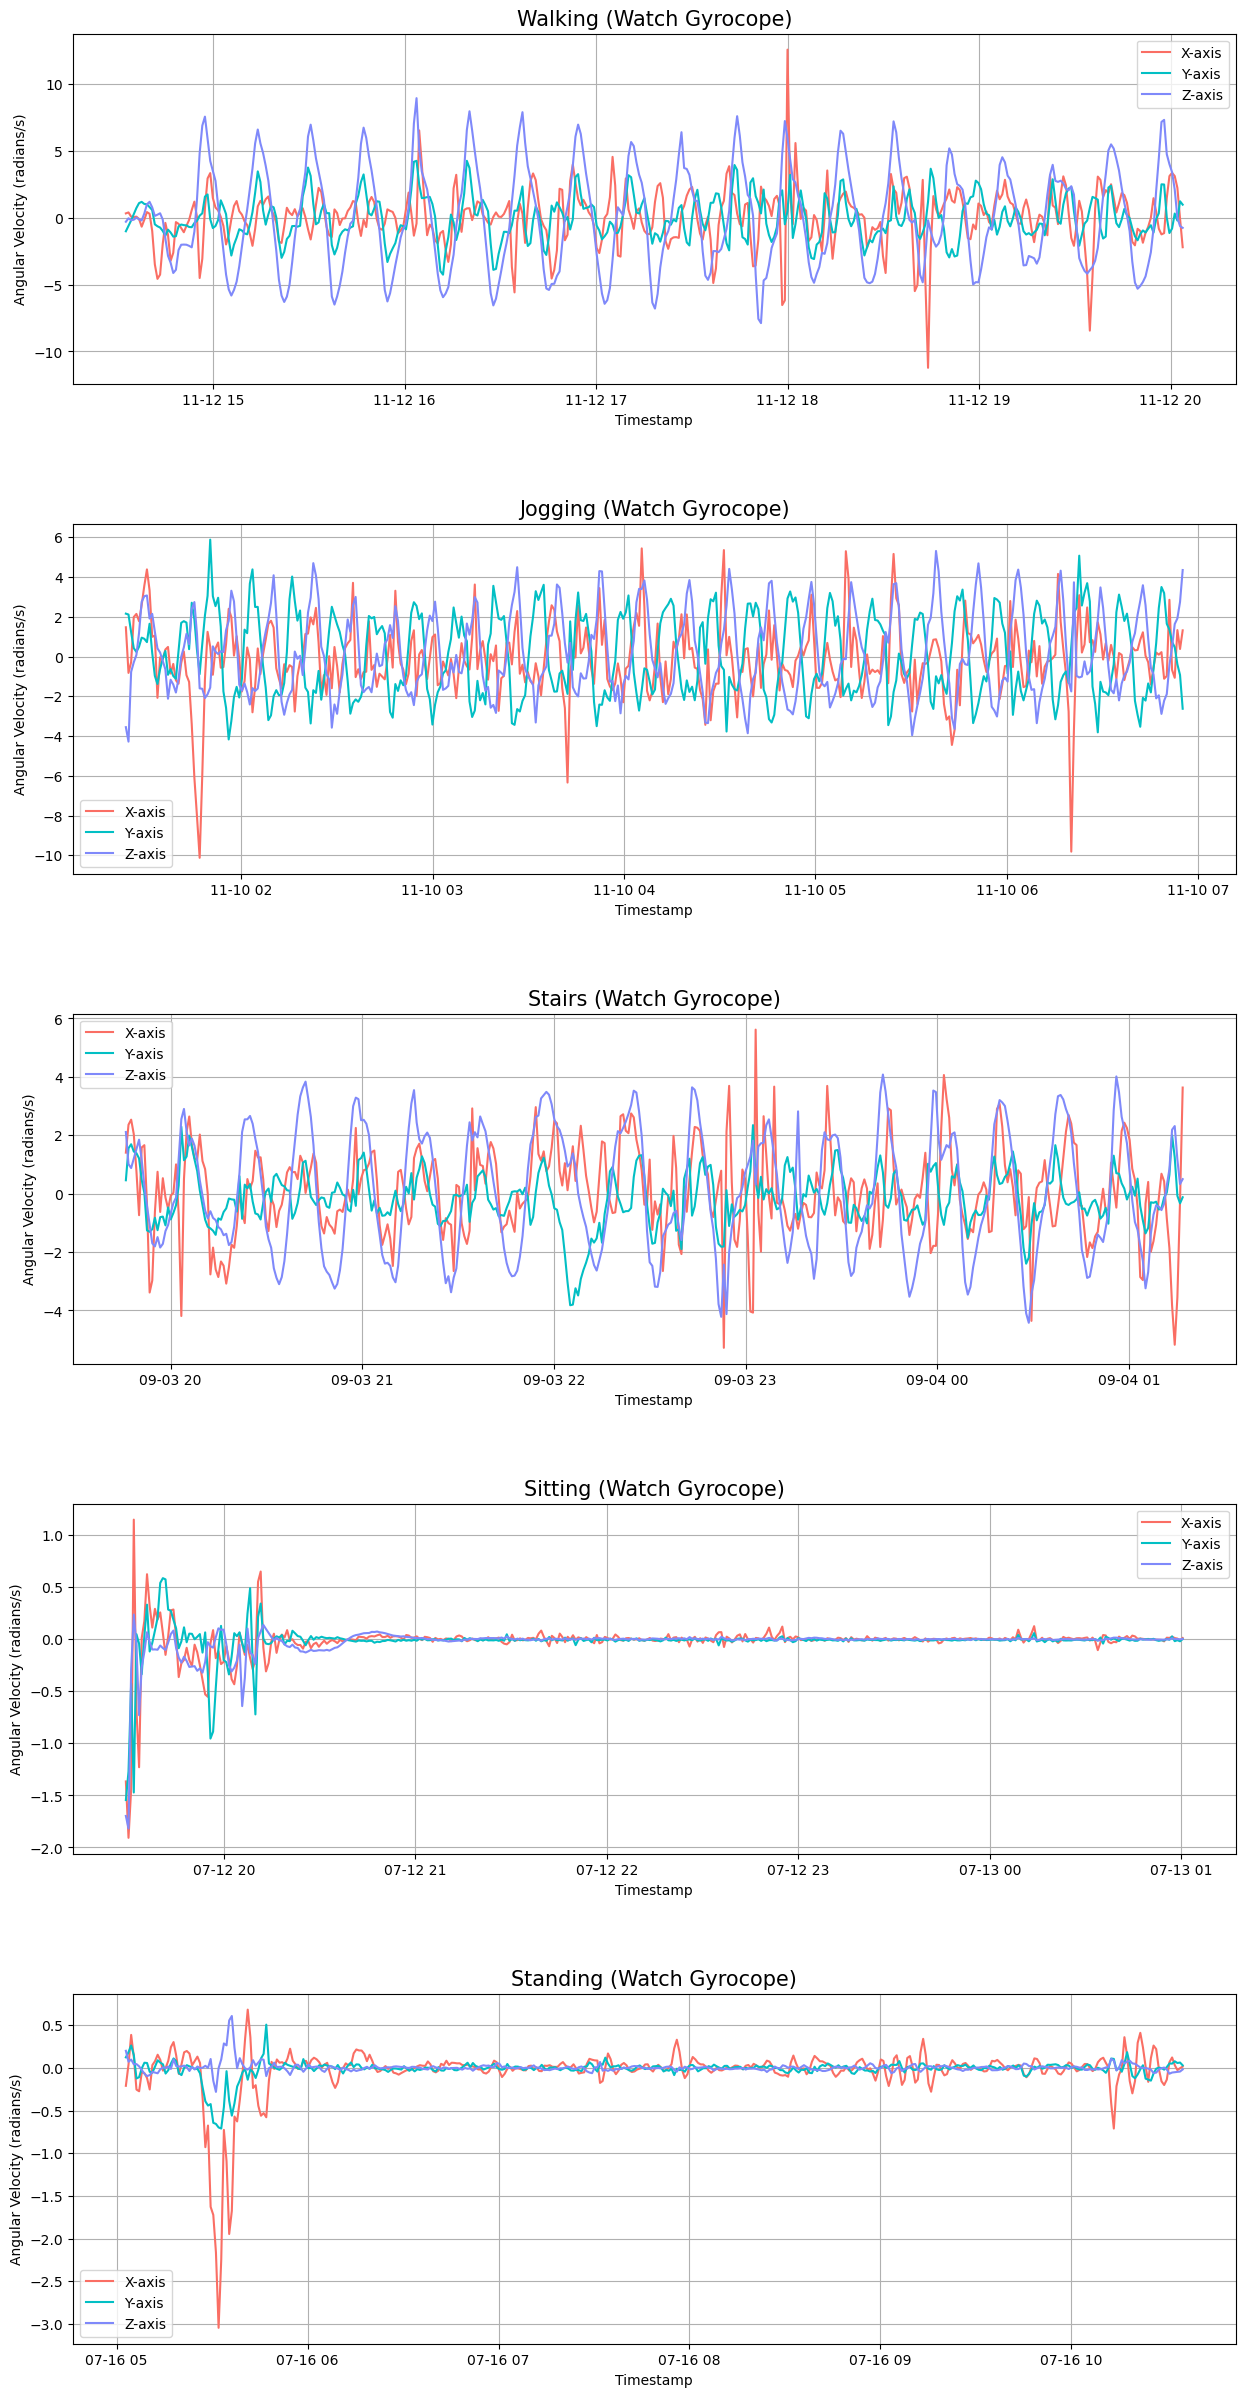

In [30]:
plot_activity_xyz(watch_gyro_df, '1600', 'Watch Gyrocope', 'Angular Velocity (radians/s)')

The graphs below displays how the signal values in each of the x, y and z dimension varies with time for a subject using a watch with gyrocope.
> **Walking A:** The gyroscope data for walking shows regular fluctuations in all three axes, indicating the rhythmic nature of walking with X range from 10 to -10, and Y and Z from 5 to -5.
>
> **Jogging B:** The data for jogging shows more intense fluctuations across all axes, reflecting the increased intensity and speed of this activity with X range from 6 to -10 Y from6 to -4 and Z 4 to -4.
>
> **Stairs C:** The data for climbing stairs shows significant fluctuations, but they are less intense than jogging. This suggests varied motion patterns as one climbs or descends stairs with X range from 6 to -4 Y 2 to -4 and Z 4 to -4. Positioned on the wrist, it records varied motion patterns due to alternating leg lifts and forward progression while climbing stairs. 
>
> **Sitting D:** The data for sitting shows minimal fluctuations, except on the date 07-12-20 with X range from 1 to -2 Y with 0.5 to -1 and Z with 0.5 to -2. Only slight movements as the wearer adjusts their position or engages in minimal activity like typing.
>
> **Standing E:** The data for standing is similar to sitting but on the date between 07-16-05 and 07-16-06 with X range from -3 to 0.5 Y from -0.5 to 0.5 and Z from -0.5 to 0.5   .

## Combining Data

After obtaining the raw data of each sensor, these were then combined to a single dataset.

In [31]:
phone_accel_df['DEVICE'] = 'Phone'
phone_accel_df['SENSOR'] = 'Accel'
phone_accel_df.head()

SUBJECT-ID ACTIVITY        TIMESTAMP         X          Y         Z DEVICE  \
0       1600        A  252207666810782 -0.364761   8.793503  1.055084  Phone   
1       1600        A  252207717164786 -0.879730   9.768784  1.016998  Phone   
2       1600        A  252207767518790  2.001495  11.109070  2.619156  Phone   
3       1600        A  252207817872794  0.450623  12.651642  0.184555  Phone   
4       1600        A  252207868226798 -2.164352  13.928436 -4.422485  Phone   

  SENSOR  
0  Accel  
1  Accel  
2  Accel  
3  Accel  
4  Accel

In [32]:
phone_gyro_df['DEVICE'] = 'Phone'
phone_gyro_df['SENSOR'] = 'Gyro'
phone_gyro_df.head()

SUBJECT-ID ACTIVITY        TIMESTAMP         X         Y         Z DEVICE  \
0       1600        A  252207918580802 -0.853210  0.297226  0.890182  Phone   
1       1600        A  252207968934806 -0.875137  0.015472  0.162231  Phone   
2       1600        A  252208019288809 -0.720169  0.388489 -0.284012  Phone   
3       1600        A  252208069642813 -0.571640  1.227402 -0.241669  Phone   
4       1600        A  252208119996817 -0.380493  1.202835 -0.213135  Phone   

  SENSOR  
0   Gyro  
1   Gyro  
2   Gyro  
3   Gyro  
4   Gyro

In [33]:
watch_accel_df['DEVICE'] = 'Watch'
watch_accel_df['SENSOR'] = 'Accel'
watch_accel_df.head()

SUBJECT-ID ACTIVITY       TIMESTAMP         X         Y         Z DEVICE  \
0       1600        A  90426708196641  7.091625 -0.591667  8.195502  Watch   
1       1600        A  90426757696641  4.972757 -0.158317  6.696732  Watch   
2       1600        A  90426807196641  3.253720 -0.191835  6.107758  Watch   
3       1600        A  90426856696641  2.801216 -0.155922  5.997625  Watch   
4       1600        A  90426906196641  3.770868 -1.051354  7.731027  Watch   

  SENSOR  
0  Accel  
1  Accel  
2  Accel  
3  Accel  
4  Accel

In [34]:
watch_gyro_df['DEVICE'] = 'Watch'
watch_gyro_df['SENSOR'] = 'Gyro'
watch_gyro_df.head()

SUBJECT-ID ACTIVITY       TIMESTAMP         X         Y         Z DEVICE  \
0       1600        A  90426757696641  0.314944 -1.022277 -0.309962  Watch   
1       1600        A  90426807196641  0.387382 -0.618541 -0.048972  Watch   
2       1600        A  90426856696641  0.070999 -0.209480 -0.195978  Watch   
3       1600        A  90426906196641  0.037975  0.254976 -0.156563  Watch   
4       1600        A  90426955696641  0.073129  0.719431 -0.001035  Watch   

  SENSOR  
0   Gyro  
1   Gyro  
2   Gyro  
3   Gyro  
4   Gyro

In [35]:
combined_raw = pd.concat([phone_accel_df, phone_gyro_df, watch_accel_df, watch_gyro_df], ignore_index=True)
column_order = ['SUBJECT-ID', 'ACTIVITY', 'TIMESTAMP', 'X', 'Y', 'Z','DEVICE', 'SENSOR',] 
combined_raw = combined_raw[column_order]
combined_raw.head(10)

SUBJECT-ID ACTIVITY        TIMESTAMP         X          Y         Z DEVICE  \
0       1600        A  252207666810782 -0.364761   8.793503  1.055084  Phone   
1       1600        A  252207717164786 -0.879730   9.768784  1.016998  Phone   
2       1600        A  252207767518790  2.001495  11.109070  2.619156  Phone   
3       1600        A  252207817872794  0.450623  12.651642  0.184555  Phone   
4       1600        A  252207868226798 -2.164352  13.928436 -4.422485  Phone   
5       1600        A  252207918580802 -4.332779  13.361191 -0.718872  Phone   
6       1600        A  252207968934806 -0.319443  13.318359 -0.232025  Phone   
7       1600        A  252208019288809  1.566452   9.515274 -0.017776  Phone   
8       1600        A  252208069642813 -0.323746   5.262665  0.322342  Phone   
9       1600        A  252208119996817 -1.811676   3.710510  1.373932  Phone   

  SENSOR  
0  Accel  
1  Accel  
2  Accel  
3  Accel  
4  Accel  
5  Accel  
6  Accel  
7  Accel  
8  Accel  
9  Accel

In [36]:
combined_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347890 entries, 0 to 4347889
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT-ID  object 
 1   ACTIVITY    object 
 2   TIMESTAMP   object 
 3   X           float64
 4   Y           float64
 5   Z           float64
 6   DEVICE      object 
 7   SENSOR      object 
dtypes: float64(3), object(5)
memory usage: 265.4+ MB


In [37]:
combined_raw.shape

(4347890, 8)

In [38]:
summary_raw = combined_raw.pivot_table(index=['ACTIVITY'], columns=['DEVICE', 'SENSOR'], aggfunc='size', fill_value=0)
summary_raw['Total'] = summary_raw.sum(axis=1)
summary_raw.loc['Total'] = summary_raw.sum()
summary_raw

DEVICE      Phone             Watch            Total
SENSOR      Accel     Gyro    Accel    Gyro         
ACTIVITY                                            
A          279817   203919   210495  192531   886762
B          268409   200252   205787  187833   862281
C          255645   197857   207312  180416   841230
D          264592   202370   213018  195050   875030
E          269604   202351   216529  194103   882587
Total     1338067  1006749  1053141  949933  4347890

> In total, there are **4347890** rows representing the total number of raw measurements for all sensors. 

# Data Transformation

Classification algorithms cannot be applied directly to raw time-series data. To address this, a **'windowing'** technique is employed, involving the division of the data into 10-second windows. A 10-second window was chosen
as it allows for the capture of multiple repetitions of actions involving repetitive movements. Simultaneously, it maintains a size small enough to enable quict responses, ensuring predictions are made every 10 seconds.

# Feature Engineering

The features engineered are based on the 200 (10s x 20 readings/s) readings contained within each segment. The function named `transform_data` organizes sensor data into non-overlapping 200-record subsets based on key columns. It also calculates various features which is then compiled into a new DataFrame for further analysis or machine learning applications. For assigning the activity against the transformed features, the most frequent activity in that window was considered. The following features are described below:

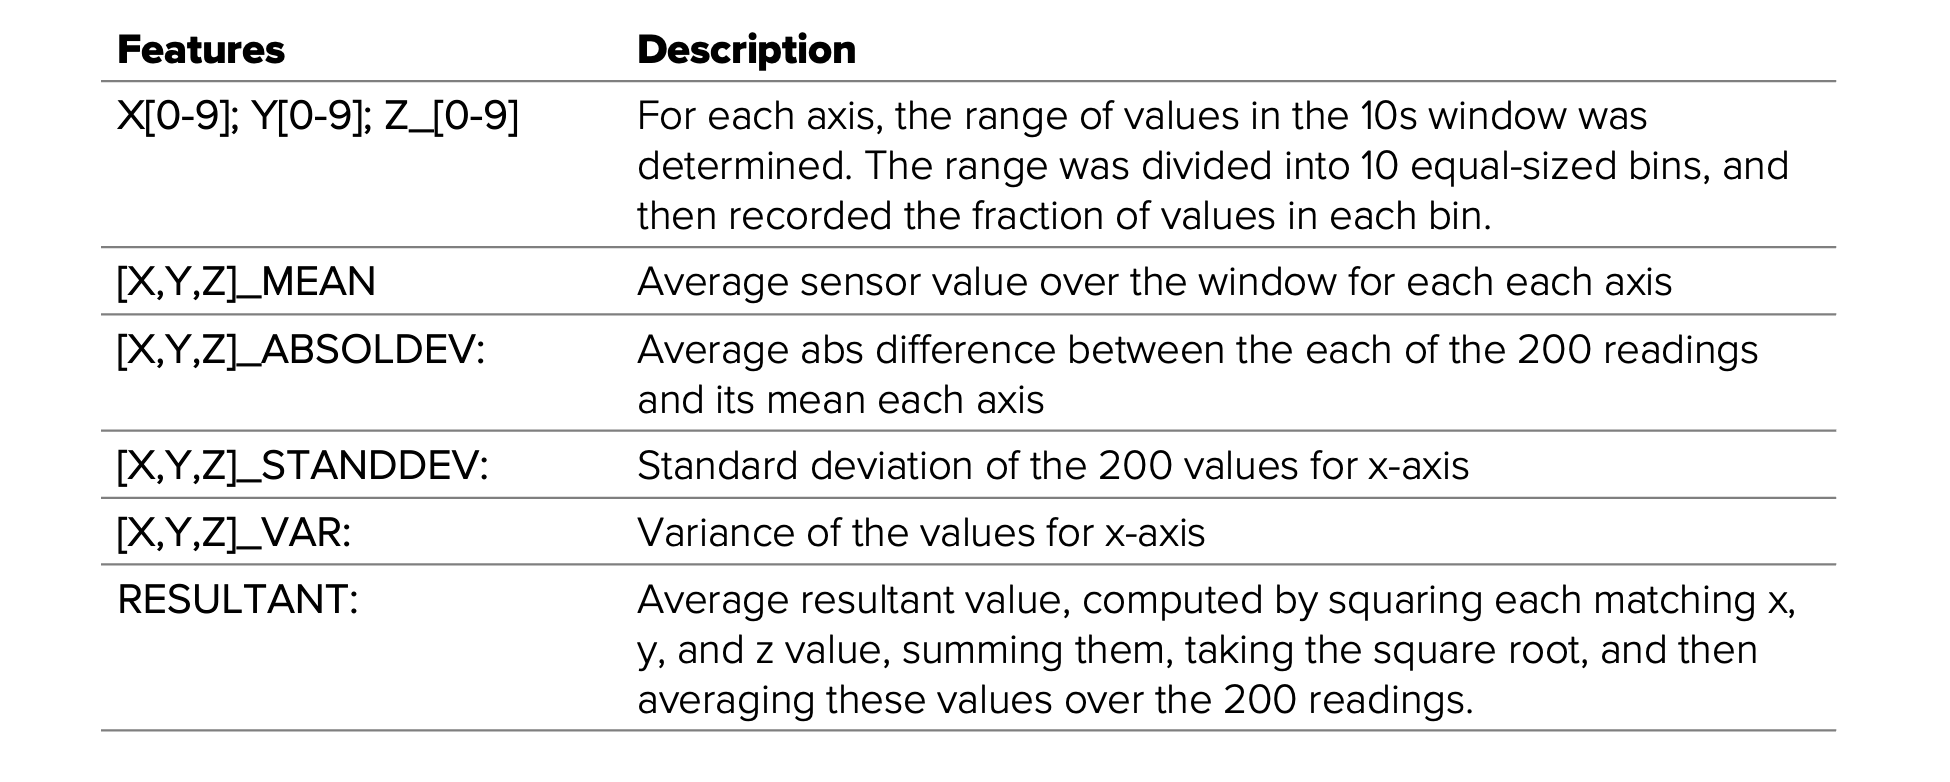

In [39]:
combined_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347890 entries, 0 to 4347889
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT-ID  object 
 1   ACTIVITY    object 
 2   TIMESTAMP   object 
 3   X           float64
 4   Y           float64
 5   Z           float64
 6   DEVICE      object 
 7   SENSOR      object 
dtypes: float64(3), object(5)
memory usage: 265.4+ MB


In [40]:
combined_raw.isna().sum()

SUBJECT-ID    0
ACTIVITY      0
TIMESTAMP     0
X             0
Y             0
Z             0
DEVICE        0
SENSOR        0
dtype: int64

In [41]:
combined_raw.loc[:, 'TIMESTAMP'] = pd.to_datetime(combined_raw['TIMESTAMP'].astype(int), unit='us')

In [42]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

def transform_data(df):
    grouped_by_subject = df.groupby(['SUBJECT-ID', 'DEVICE', 'SENSOR'])
    transformed_rows = []
    rows_per_group = 200
    num_bins = 10

    for (_, _, _), group in grouped_by_subject:
        for i in range(0, len(group), rows_per_group):
            subset = group.iloc[i:i + rows_per_group]

            mean_x = subset['X'].mean()  # Mean
            mean_y = subset['Y'].mean()
            mean_z = subset['Z'].mean()

            abs_dev_x = subset['X'].mad()  # Mean Absolute Deviation
            abs_dev_y = subset['Y'].mad()
            abs_dev_z = subset['Z'].mad()

            std_dev_x = subset['X'].std()  # Standard Deviation
            std_dev_y = subset['Y'].std()
            std_dev_z = subset['Z'].std()

            var_x = subset['X'].var()  # Variance
            var_y = subset['Y'].var()
            var_z = subset['Z'].var()

            mode_activity = subset['ACTIVITY'].mode().iloc[0]

            resultant_values = np.sqrt(subset['X']**2 + subset['Y']**2 + subset['Z']**2)
            average_resultant = resultant_values.mean()
            
            
            row = {
                'SUBJECT-ID': subset['SUBJECT-ID'].iloc[0],
                'DEVICE': subset['DEVICE'].iloc[0],
                'SENSOR': subset['SENSOR'].iloc[0],
                'ACTIVITY': mode_activity,
            }

            for axis in ['X', 'Y', 'Z']:
                range_values = subset[axis].max() - subset[axis].min()
                bins = np.linspace(subset[axis].min(), subset[axis].max(), num_bins+1)
                bin_counts = np.histogram(subset[axis], bins=bins)[0]
                bin_fractions = bin_counts / len(subset)
                for j in range(num_bins):
                    row[f'{axis}{j}'] = bin_fractions[j]
                     

            row.update({
                'X_MEAN': mean_x,
                'Y_MEAN': mean_y,
                'Z_MEAN': mean_z,
                'X_ABSOLDEV': abs_dev_x,
                'Y_ABSOLDEV': abs_dev_y,
                'Z_ABSOLDEV': abs_dev_z,
                'X_STANDDEV': std_dev_x,
                'Y_STANDDEV': std_dev_y,
                'Z_STANDDEV': std_dev_z,
                'X_VAR': var_x,
                'Y_VAR': var_y,
                'Z_VAR': var_z,
                'RESULTANT': average_resultant,
            })

            transformed_rows.append(row)

    df_transformed = pd.DataFrame(transformed_rows)
    df_transformed = pd.DataFrame(transformed_rows)
    df_transformed = df_transformed.sort_values(by=['DEVICE', 'SENSOR'])

    return df_transformed

In [43]:
result_df = transform_data(combined_raw)

In [44]:
result_df.head(5)

SUBJECT-ID DEVICE SENSOR ACTIVITY     X0     X1     X2     X3     X4     X5  \
0       1600  Phone  Accel        A  0.005  0.010  0.050  0.085  0.140  0.190   
1       1600  Phone  Accel        A  0.030  0.025  0.060  0.065  0.125  0.215   
2       1600  Phone  Accel        A  0.030  0.015  0.045  0.095  0.260  0.245   
3       1600  Phone  Accel        A  0.040  0.055  0.060  0.090  0.135  0.170   
4       1600  Phone  Accel        A  0.020  0.025  0.075  0.095  0.180  0.215   

   ...  X_ABSOLDEV  Y_ABSOLDEV  Z_ABSOLDEV  X_STANDDEV  Y_STANDDEV  \
0  ...    1.590951    3.295082    1.609412    2.001460    4.016927   
1  ...    1.778171    3.334897    1.682959    2.285838    4.082519   
2  ...    1.705051    3.142438    1.692879    2.214540    3.818135   
3  ...    1.623145    3.327896    1.579443    2.009270    4.017430   
4  ...    1.488884    3.011961    1.459307    1.864886    3.635473   

   Z_STANDDEV     X_VAR      Y_VAR     Z_VAR  RESULTANT  
0    2.265584  4.005843  16.135706  5.132869  10.051759  
1    2.239964  5.225054  16.666963  5.017437  10.117089  
2    2.265545  4.904187  14.578156  5.132694   9.983843  
3    2.188970  4.037165  16.139746  4.791589  10.106010  
4    1.988884  3.477800  13.216663  3.955659  10.052094  

[5 rows x 47 columns]

In [45]:
result_df.shape

(21875, 16)

In [46]:
transformed_summary = result_df.pivot_table(index=['ACTIVITY'], columns=['DEVICE', 'SENSOR'], aggfunc='size', fill_value=0)
transformed_summary['Total'] = transformed_summary.sum(axis=1)
transformed_summary.loc['Total'] = transformed_summary.sum()
transformed_summary

DEVICE   Phone       Watch        Total
SENSOR   Accel  Gyro Accel  Gyro       
ACTIVITY                               
A         1409  1026  1053   961   4449
B         1334  1004  1025   941   4304
C         1285   996  1037   901   4219
D         1307   984  1066   974   4331
E         1386  1052  1125  1009   4572
Total     6721  5062  5306  4786  21875

> Since there are 51 subjects performing 5 activities for 3 minutes per activity, it is expected to have 12.75 hours of examples. Since 10-second window was used, this is about yields 4,590 examples per sensor. As observed in the table above, 75% of the sensors is consistent with what we say with the raw time series data except the phone accelerometer.
>
> Moreover, the resulting transformed data consists of **21875** rows with 16 columns.

# Data Splitting

In this project, **70:30** train test split was employed. The 70% was used for training while the 30% was used for assessing the performance of the model. **Stratified k-Fold Cross Validation** was then applied to mitigate overfitting and improve its ability to generalize to new, unseen data. 

In [45]:
result_df.drop('SUBJECT-ID', axis = 1, inplace = True)
result_df = result_df.dropna()  
result_df = pd.get_dummies(result_df, columns=['DEVICE', 'SENSOR'])

In [46]:
from sklearn.model_selection import train_test_split

y = result_df['ACTIVITY']
X = result_df.drop('ACTIVITY', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.70, 
                                                    test_size = 0.30,
                                                    shuffle = True, 
                                                    stratify = result_df.ACTIVITY,
                                                    random_state = 42)

In [47]:
X_train

X0     X1     X2     X3     X4     X5     X6     X7     X8     X9  \
12939  0.005  0.005  0.015  0.030  0.125  0.245  0.280  0.195  0.065  0.035   
1390   0.085  0.070  0.125  0.130  0.085  0.020  0.060  0.100  0.180  0.145   
5266   0.030  0.050  0.125  0.115  0.245  0.245  0.110  0.055  0.005  0.020   
4618   0.005  0.010  0.065  0.110  0.315  0.335  0.115  0.035  0.005  0.005   
3239   0.115  0.065  0.030  0.075  0.145  0.085  0.240  0.095  0.090  0.060   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
15916  0.025  0.050  0.035  0.020  0.040  0.145  0.215  0.210  0.175  0.085   
756    0.015  0.010  0.025  0.060  0.205  0.315  0.255  0.080  0.025  0.010   
9795   0.015  0.015  0.035  0.150  0.180  0.215  0.150  0.080  0.110  0.050   
12787  0.025  0.045  0.355  0.505  0.035  0.015  0.000  0.015  0.000  0.005   
2984   0.010  0.015  0.055  0.115  0.185  0.235  0.180  0.145  0.035  0.025   

       ...  Y_STANDDEV  Z_STANDDEV       X_VAR       Y_VAR      Z_VAR  \
12939  ...    0.744144    0.938944    1.006349    0.553751   0.881616   
1390   ...   11.106184    6.994013  152.098744  123.347315  48.916222   
5266   ...    0.521044    0.875465    1.111824    0.271487   0.766439   
4618   ...    0.071445    0.123733    0.001711    0.005104   0.015310   
3239   ...    1.129294    0.711323    1.322377    1.275304   0.505980   
...    ...         ...         ...         ...         ...        ...   
15916  ...    2.155397    1.958941    7.245339    4.645737   3.837450   
756    ...    0.009085    0.009969    0.000915    0.000083   0.000099   
9795   ...    0.089598    0.083908    0.007003    0.008028   0.007041   
12787  ...    0.021672    0.011907    0.000624    0.000470   0.000142   
2984   ...    0.804829    0.383048    0.038778    0.647750   0.146726   

       RESULTANT  DEVICE_Phone  DEVICE_Watch  SENSOR_Accel  SENSOR_Gyro  
12939   1.324427             0             1             0            1  
1390   19.474990             0             1             1            0  
5266    1.336312             0             1             0            1  
4618    9.914183             1             0             1            0  
3239    1.596341             1             0             0            1  
...          ...           ...           ...           ...          ...  
15916   3.493782             0             1             0            1  
756     0.026239             0             1             0            1  
9795    9.592301             1             0             1            0  
12787   0.023538             1             0             0            1  
2984    9.870899             0             1             1            0  

[15311 rows x 47 columns]

In [48]:
y_train

12939    C
1390     B
5266     C
4618     D
3239     A
        ..
15916    B
756      E
9795     D
12787    E
2984     E
Name: ACTIVITY, Length: 15311, dtype: object

In [49]:
X_test

X0     X1     X2     X3     X4     X5     X6     X7     X8     X9  \
20508  0.025  0.100  0.170  0.165  0.250  0.155  0.080  0.025  0.020  0.010   
8613   0.005  0.055  0.160  0.210  0.240  0.115  0.105  0.055  0.035  0.020   
2607   0.035  0.065  0.085  0.165  0.250  0.220  0.135  0.020  0.020  0.005   
19175  0.045  0.065  0.055  0.100  0.165  0.110  0.090  0.150  0.155  0.065   
19427  0.045  0.075  0.095  0.150  0.155  0.225  0.200  0.040  0.005  0.010   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
17027  0.020  0.185  0.340  0.175  0.135  0.055  0.050  0.030  0.000  0.010   
17577  0.010  0.010  0.010  0.040  0.055  0.160  0.225  0.185  0.275  0.030   
14885  0.005  0.000  0.040  0.325  0.575  0.025  0.020  0.005  0.000  0.005   
4007   0.070  0.085  0.175  0.125  0.125  0.135  0.130  0.070  0.045  0.040   
17605  0.010  0.005  0.005  0.010  0.015  0.045  0.170  0.540  0.180  0.020   

       ...  Y_STANDDEV  Z_STANDDEV       X_VAR      Y_VAR      Z_VAR  \
20508  ...    4.892094    2.007646    4.952832  23.932584   4.030643   
8613   ...    2.418270    1.995223    1.832126   5.848030   3.980914   
2607   ...    2.672951    4.433906    9.462723   7.144665  19.659522   
19175  ...    1.447483    1.408714    1.666857   2.095208   1.984476   
19427  ...    0.788345    2.242956    3.617981   0.621488   5.030852   
...    ...         ...         ...         ...        ...        ...   
17027  ...    8.060544    8.308057  156.420971  64.972363  69.023807   
17577  ...    6.862996    3.998096  130.561937  47.100720  15.984769   
14885  ...    0.189059    0.106503    0.008767   0.035743   0.011343   
4007   ...    1.557905    0.931843    6.202823   2.427067   0.868331   
17605  ...    0.051235    0.055051    0.001919   0.002625   0.003031   

       RESULTANT  DEVICE_Phone  DEVICE_Watch  SENSOR_Accel  SENSOR_Gyro  
20508   9.908235             1             0             1            0  
8613    9.702872             1             0             1            0  
2607    5.543680             0             1             0            1  
19175   2.228216             1             0             0            1  
19427   2.685007             0             1             0            1  
...          ...           ...           ...           ...          ...  
17027  15.780319             1             0             1            0  
17577  12.776835             1             0             1            0  
14885  10.009252             0             1             1            0  
4007   10.774999             0             1             1            0  
17605   9.993660             1             0             1            0  

[6563 rows x 47 columns]

In [50]:
y_test

20508    C
8613     C
2607     B
19175    A
19427    C
        ..
17027    B
17577    B
14885    E
4007     A
17605    D
Name: ACTIVITY, Length: 6563, dtype: object

In [51]:
y_train.value_counts()

E    3199
A    3114
D    3032
B    3013
C    2953
Name: ACTIVITY, dtype: int64

In [52]:
import matplotlib.pyplot as plt

def plot_activity_train_test(df, title):
    activity_labels = {'A': 'Walking', 'B': 'Jogging', 'C': 'Stairs', 'D': 'Sitting', 'E': 'Standing'}
    activity_counts = df.value_counts().sort_index().sort_values(ascending=True)

    ax = activity_counts.plot(kind='barh', color='#FA6E64')

    for idx, p in enumerate(ax.patches):
        count = activity_counts[activity_counts.index[idx]]
        ax.annotate(f"{activity_labels[activity_counts.index[idx]]} ({count})", 
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), ha='right', va='center', 
                    xytext=(-6, 0), textcoords='offset points', color='black', rotation=0)

    plt.xlabel('Count')
    plt.ylabel('Activity')
    plt.title(f'{title}')

    ax.set_xticks([])
    ax.set_xlabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

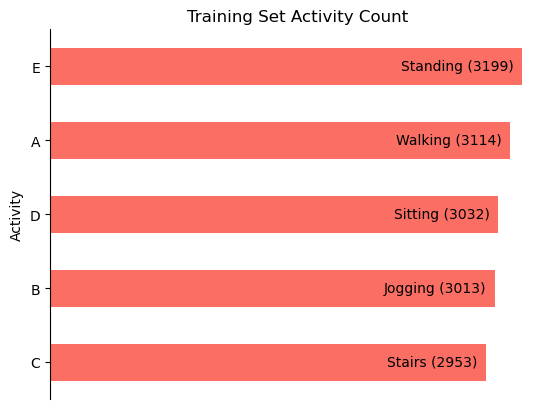

In [53]:
plot_activity_train_test(y_train, 'Training Set Activity Count')

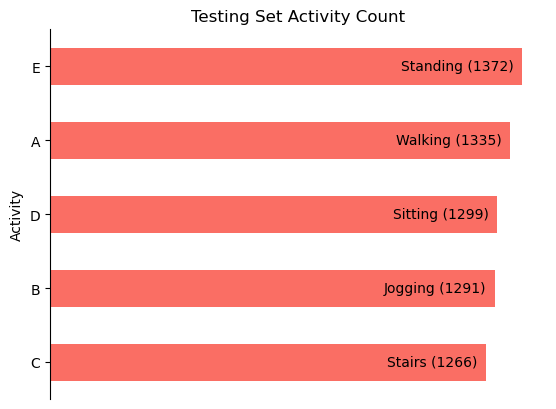

In [54]:
plot_activity_train_test(y_test, 'Testing Set Activity Count')

> It can be observed from the above charts that there is about balanced distribution in all activities for both training and testing dataset.

In [55]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['X_MEAN', 'Y_MEAN', 'Z_MEAN', 'X_ABSOLDEV', 'Y_ABSOLDEV', 'Z_ABSOLDEV',
                           'X_STANDDEV', 'Y_STANDDEV', 'Z_STANDDEV', 'X_VAR', 'Y_VAR', 'Z_VAR']

scaler = StandardScaler()
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])

# Predictive Modelling

## Random Forest Classifier

Random Forest (RF) is a supervised machine learning algorithm that combines the output of multiple decision trees to reach a single result. It can handle both classification and regression problems. The algorithm creates multiple decision trees on subsets of the data and averages their predictions to improve the model’s accuracy and prevent overfitting.

In determining the best set of hyperparameters for RF, **grid search** was used for tuning.

In [56]:
from sklearn.model_selection import StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_scorer = make_scorer(precision_score, zero_division=1, average='weighted')

In [58]:
from sklearn.model_selection import GridSearchCV

rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, scoring=rf_scorer, refit='accuracy', cv=stratified_kfold)

rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             refit='accuracy',
             scoring=make_scorer(precision_score, zero_division=1, average=weighted))

In [59]:
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_

print("Best Hyperparameters for Random Forest:", rf_best_params)

Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [60]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(rf_best_model, X_train, y_train, cv=stratified_kfold)
precision = cross_val_score(rf_best_model, X_train, y_train, cv=stratified_kfold)
recall = cross_val_score(rf_best_model, X_train, y_train, cv=stratified_kfold)
f1 = cross_val_score(rf_best_model, X_train, y_train, cv=stratified_kfold)

In [61]:
print(f"Cross-Validation Accuracy: {accuracy.mean()*100:.8f}%")
print(f"Cross-Validation Precision: {precision.mean()*100:.8f}%")
print(f"Cross-Validation Recall: {recall.mean()*100:.8f}%")
print(f"Cross-Validation F1 Score: {f1.mean():.8f}")

Cross-Validation Accuracy: 85.59860606%
Cross-Validation Precision: 85.59860606%
Cross-Validation Recall: 85.59860606%
Cross-Validation F1 Score: 0.85598606


In [62]:
rf_best_model.fit(X_train, y_train)
y_pred_rf = rf_best_model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_accuracy = accuracy_score(y_test, y_pred_rf)
test_precision = precision_score(y_test, y_pred_rf, average='weighted')
test_recall = recall_score(y_test, y_pred_rf, average='weighted')
test_f1 = f1_score(y_test, y_pred_rf, average='weighted')

In [64]:
print("Random Forest Test Set Metrics:")
print(f"Accuracy: {test_accuracy*100:.8f}%")
print(f"Precision: {test_precision*100:.8f}%")
print(f"Recall: {test_recall*100:.8f}%")
print(f"F1 Score: {test_f1:.8f}")

Random Forest Test Set Metrics:
Accuracy: 86.72863020%
Precision: 86.96150324%
Recall: 86.72863020%
F1 Score: 0.86730653


> RF model obtained an accuracy of **86.73%** for its performance of the test set. It also achieved an precision of **86.96%**, recall of **86.72%** and F1 score of **0.8673**. The high values for accuracy, precision, recall, and F1 score suggest that the RF model is performing well on the test set. Basically, what that meant is that it was able to predict the activity well.
>
> Moreover, the balanced nature of precision and recall (similar values) indicates that the model is effective in both correctly identifying positive instances and avoiding false positives. The F1 score, being close to precision and recall, further confirms a balanced performance.

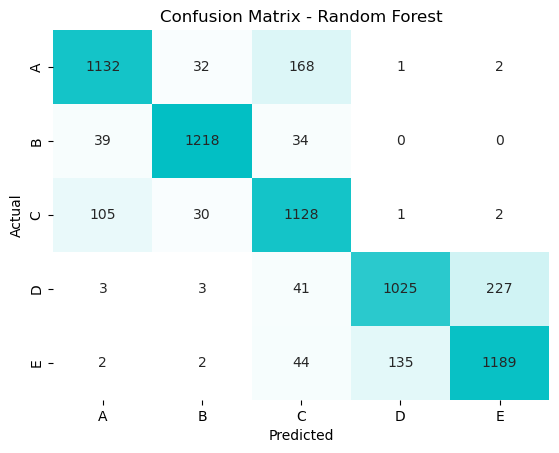

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

colors = ['#FFFFFF', '#02BFC4']
cmap = LinearSegmentedColormap.from_list('Custom', colors, N=256)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=cmap, cbar=False, 
            xticklabels=['A', 'B', 'C', 'D', 'E'],
            yticklabels=['A', 'B', 'C', 'D', 'E'])

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

> Although the **RF** model have correctly predicted many labels, there were instances where they failed to accurately predict certain activities. Specifically, there is a recurring pattern where **Walking (A)** is frequently misclassified as **Stairs (C)**, and vice versa. Additionally, a notable number of misclassifications occur between **Standing (D)** and **Sitting (E)**. This could be attributed to the inherent similarity between these activities making it difficult for the models to determine which is which. 

In [79]:
from sklearn.metrics import classification_report
rf_report = classification_report(y_test, y_pred_rf)

In [80]:
print(rf_report)

              precision    recall  f1-score   support

           A       0.88      0.85      0.87      1335
           B       0.95      0.94      0.95      1291
           C       0.80      0.89      0.84      1266
           D       0.88      0.79      0.83      1299
           E       0.84      0.87      0.85      1372

    accuracy                           0.87      6563
   macro avg       0.87      0.87      0.87      6563
weighted avg       0.87      0.87      0.87      6563



> From the classification report, it can be concluded that the RF model performed best for classifying **Jogging (B)**. It excels in both precision and recall for B, suggesting accurate and comprehensive predictions. In addittion, the model is more conservative in predicting **Stairs (C)**, ensuring a higher recall but at the cost of precision. For **Sitting (D)**, it has a lower recall **(79%)**, suggesting some difficulty in identifying positive instances for this class. The model may miss some instances of D but is accurate when it predicts it.
>
> Overall, the RF model performed well with its relatively high precision, recall, and F1-score values and overall accuracy of **87%**.


## Multilayer Perceptron

A Multilayer Perceptron (MLP) is a type of feedforward artificial neural network that consists of multiple layers of neurons, each fully connected to the next. It uses a nonlinear activation function and can classify data that is not linearly separable12. MLPs are trained using the backpropagation method1.

In [65]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state=42, max_iter=10000)

In [66]:
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

In [67]:
mlp_scorer = make_scorer(accuracy_score)

In [68]:
mlp_grid_search = GridSearchCV(mlp_classifier, mlp_param_grid, scoring=mlp_scorer, cv=stratified_kfold, refit='accuracy')
mlp_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPClassifier(max_iter=10000, random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
                         'learning_rate': ['constant', 'adaptive']},
             refit='accuracy', scoring=make_scorer(accuracy_score))

In [69]:
mlp_best_params = mlp_grid_search.best_params_
mlp_best_model = mlp_grid_search.best_estimator_

print("Best Hyperparameters for MLP:", mlp_best_params)

Best Hyperparameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}


In [70]:
accuracy = cross_val_score(mlp_best_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
precision = cross_val_score(mlp_best_model, X_train, y_train, cv=stratified_kfold, scoring='precision_weighted')
recall = cross_val_score(mlp_best_model, X_train, y_train, cv=stratified_kfold, scoring='recall_weighted')
f1 = cross_val_score(mlp_best_model, X_train, y_train, cv=stratified_kfold, scoring='f1_weighted')

In [71]:
print(f"Cross-Validation Accuracy: {accuracy.mean()*100:.8f}%")
print(f"Cross-Validation Precision: {precision.mean()*100:.8f}%")
print(f"Cross-Validation Recall: {recall.mean()*100:.8f}%")
print(f"Cross-Validation F1 Score: {f1.mean():.8f}")

Cross-Validation Accuracy: 83.60655496%
Cross-Validation Precision: 83.75316209%
Cross-Validation Recall: 83.60655496%
Cross-Validation F1 Score: 0.83598597


In [72]:
mlp_best_model.fit(X_train, y_train)
y_pred_mlp = mlp_best_model.predict(X_test)

In [73]:
test_accuracy = accuracy_score(y_test, y_pred_mlp)
test_precision = precision_score(y_test, y_pred_mlp, average='weighted')
test_recall = recall_score(y_test, y_pred_mlp, average='weighted')
test_f1 = f1_score(y_test, y_pred_mlp, average='weighted')

In [74]:
print("MLP Test Set Metrics:")
print(f"Accuracy: {test_accuracy*100:.8f}%")
print(f"Precision: {test_precision*100:.8f}%")
print(f"Recall: {test_recall*100:.8f}%")
print(f"F1 Score: {test_f1:.8f}")

MLP Test Set Metrics:
Accuracy: 84.42785312%
Precision: 84.46085258%
Recall: 84.42785312%
F1 Score: 0.84433679


> The MLP model is able to make correct predictions for a significant portion of instances, predicting approximately **84.43%** in the test set. It also obtained good results for preciison, recall, and f1 score with values **84.46%**, **84.43%**, **0.84**, respectively. 
>
> The metrics suggest that the MLP model has a good performance on the test set, as all the values are relatively high.

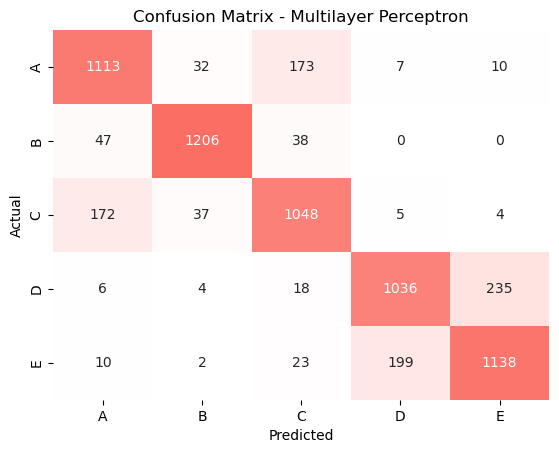

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

colors = ['#FFFFFF', '#FA6E64']
cmap = LinearSegmentedColormap.from_list('Custom', colors, N=256)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap=cmap, cbar=False, 
            xticklabels=['A', 'B', 'C', 'D', 'E'],
            yticklabels=['A', 'B', 'C', 'D', 'E'])

plt.title('Confusion Matrix - Multilayer Perceptron')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

> Similar with the RF confusion matrix, the MLP model misclassified Walking (A) as Stairs (C), and Sitting (D) and Standing (E) in numerous instances.

In [76]:
from sklearn.metrics import classification_report
mlp_report = classification_report(y_test, y_pred_mlp)

In [78]:
print(mlp_report)

              precision    recall  f1-score   support

           A       0.83      0.83      0.83      1335
           B       0.94      0.93      0.94      1291
           C       0.81      0.83      0.82      1266
           D       0.83      0.80      0.81      1299
           E       0.82      0.83      0.82      1372

    accuracy                           0.84      6563
   macro avg       0.84      0.84      0.84      6563
weighted avg       0.84      0.84      0.84      6563



> For the MLP model, Jogging (B) has the highest precision **(94%)**, indicating a low false positive rate. The model effectively identifies class B instances, but potential improvements in recall may be explored. Sitting (D) has a lower recall **(80%)**, suggesting some difficulty in identifying positive instances for this class. The F1 Score is also balanced, taking both precision and recall into account.
>
> The weighted average metrics indicate a balanced performance across all classes, with an overall accuracy of **84%**.

# Performance Comparison

> While both RF and MLP models demonstrated successful predictions of activity based on `TIMESTAMP`, `X`, `Y`, `Z`, `DEVICE`, and `SENSOR` values, the RF model outperformed the MLP model in terms of overall performance on classification. 

> Nonetheless, insights from accuracy, precision, recall, and the F1-score can guide targeted improvements for the model. The project can still be further improved to enhance the classification of activities. 